# Practice Lab: Advice for Applying Machine Learning
In this lab, you will explore techniques to evaluate and improve your machine learning models.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Evaluating a Learning Algorithm (Polynomial Regression)](#2)
  - [ 2.1 Splitting your data set](#2.1)
  - [ 2.2 Error calculation for model evaluation, linear regression](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 Compare performance on training and test data](#2.3)
- [ 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> ](#3)
  - [ 3.1 Plot Train, Cross-Validation, Test](#3.1)
  - [ 3.2 Finding the optimal degree](#3.2)
  - [ 3.3 Tuning Regularization.](#3.3)
  - [ 3.4 Getting more data: Increasing Training Set Size (m)](#3.4)
- [ 4 - Evaluating a Learning Algorithm (Neural Network)](#4)
  - [ 4.1 Data Set](#4.1)
  - [ 4.2 Evaluating categorical model by calculating classification error](#4.2)
    - [ Exercise 2](#ex02)
- [ 5 - Model Complexity](#5)
  - [ Exercise 3](#ex03)
  - [ 5.1 Simple model](#5.1)
    - [ Exercise 4](#ex04)
- [ 6 - Regularization](#6)
  - [ Exercise 5](#ex05)
- [ 7 - Iterate to find optimal regularization value](#7)
  - [ 7.1 Test](#7.1)


<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [scikitlearn](https://scikit-learn.org/stable/) is a basic library for data mining
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

<a name="2"></a>
## 2 - Evaluating a Learning Algorithm (Polynomial Regression)

<img align="Right" src="./images/C2_W3_TrainingVsNew.png"  style=" width:350px; padding: 10px 20px ; "> Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training" and "Test" sets. 
    * Use the training data to fit the parameters of the model
    * Use the test data to evaluate the model on *new* data
* Develop an error function to evaluate your model.

<a name="2.1"></a>
### 2.1 Splitting your data set
Lectures advised reserving 20-40% of your data set for testing. Let's use an `sklearn` function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to perform the split. Double-check the shapes after running the following cell.

In [2]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

#### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

In [3]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

<a name="ex01"></a>
### Exercise 1

Below, create a function to evaluate the error on a data set for a linear regression model.

In [4]:
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar) Mean squared error
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err += (y[i] - yhat[i]) ** 2
    
    err = err/(2*m)  
    # Divide the sum of squared errors by the number of examples (m) to get the mean squared error
    return err


In [5]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)   
# END UNIT TEST

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>

    
```python
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err_i  = ( (yhat[i] - y[i])**2 ) 
        err   += err_i                                                                
    err = err / (2*m)                    
    return(err)
``` 

<a name="2.3"></a>
### 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [6]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

The computed error on the training set is substantially less than that of the test set. 

In [7]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.  
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

In [8]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [9]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

<a name="3"></a>
## 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> 
 Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out, as shown in the diagram, the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

<a name="3.1"></a>
### 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="3.2"></a>
### 3.2 Finding the optimal degree
In previous labs, you found that you could create a model capable of fitting complex curves by utilizing a polynomial (See Course1, Week2 Feature Engineering and Polynomial Regression Lab).  Further, you demonstrated that by increasing the *degree* of the polynomial, you could *create* overfitting. (See Course 1, Week3, Over-Fitting Lab). Let's use that knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) linear regression model for speed and simplicity.

In [11]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

<font size="4">Let's plot the result:</font>

In [12]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used. 
- On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point. 
- on the right:
    - the error on the trained data (blue) decreases as the model complexity increases as expected
    - the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to *generalize*).     
    
It's worth noting that the curves in these examples as not as smooth as one might draw for a lecture. It's clear the specific data points assigned to each group can change your results significantly. The general trend is what is important.

<a name="3.3"></a>
### 3.3 Tuning Regularization.
In previous labs, you have utilized *regularization* to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda ($\lambda$).

Let's demonstrate this by starting with a high degree polynomial and varying the regularization parameter.

In [13]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

In [14]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10. 

<a name="3.4"></a>
### 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance. Let's try that here.

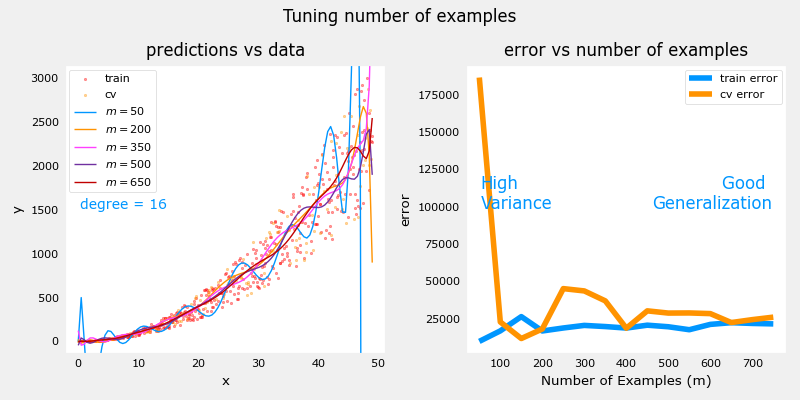

In [4]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of $m$ is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization. 

> Note that adding more examples when the model has high bias (underfitting) does not improve performance.


<a name="4"></a>
## 4 - Evaluating a Learning Algorithm (Neural Network)
Above, you tuned aspects of a polynomial regression model. Here, you will work with a neural network model. Let's start by creating a classification data set. 

<a name="4.1"></a>
### 4.1 Data Set
Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.  

In [5]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


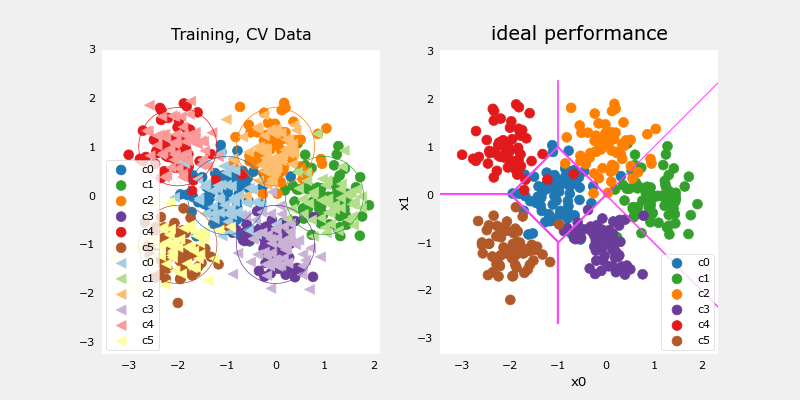

In [6]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?  
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

<a name="4.2"></a>
### 4.2 Evaluating categorical model by calculating classification error
The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>
### Exercise 2

Below, complete the routine to calculate classification error. Note, in this lab, target values are the index of the category and are not [one-hot encoded](https://en.wikipedia.org/wiki/One-hot).

In [2]:
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      cerr: (scalar) Categorization error
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
        if y[i] != yhat[i]:
            incorrect += 1
    
    cerr = incorrect / m  # Calculate the fraction of incorrect predictions
    return cerr


In [3]:

y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST
# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
        if yhat[i] != y[i]:    # @REPLACE
            incorrect += 1     # @REPLACE
    cerr = incorrect/m         # @REPLACE
    return(cerr)                                    
``` 

<a name="5"></a>
## 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

###  5.1 Complex model

<a name="ex03"></a>
### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [32]:
import logging
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.random.set_seed(1234)

model = Sequential(
    [
        Dense(120, activation='relu'),  # Input layer with 120 units and ReLU activation
        Dense(40, activation='relu'),  # Hidden layer with 40 units and ReLU activation
        Dense(6, activation="linear")  # Output layer with 6 units and linear activation (from_logits=True)
    ],
    name="Complex"
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
)


In [33]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 667us/step - loss: 1.0966
Epoch 2/1000
13/13 [==============================] - 0s 617us/step - loss: 0.4108
Epoch 3/1000
13/13 [==============================] - 0s 637us/step - loss: 0.3124
Epoch 4/1000
13/13 [==============================] - 0s 620us/step - loss: 0.2826
Epoch 5/1000
13/13 [==============================] - 0s 498us/step - loss: 0.2823
Epoch 6/1000
13/13 [==============================] - 0s 531us/step - loss: 0.3024
Epoch 7/1000
13/13 [==============================] - 0s 509us/step - loss: 0.2521
Epoch 8/1000
13/13 [==============================] - 0s 621us/step - loss: 0.2260
Epoch 9/1000
13/13 [==============================] - 0s 559us/step - loss: 0.2265
Epoch 10/1000
13/13 [==============================] - 0s 620us/step - loss: 0.2076
Epoch 11/1000
13/13 [==============================] - 0s 545us/step - loss: 0.2210
Epoch 12/1000
13/13 [==============================] - 0s 577us/step - loss: 0.2087
E

13/13 [==============================] - 0s 512us/step - loss: 0.1887
Epoch 99/1000
13/13 [==============================] - 0s 545us/step - loss: 0.1896
Epoch 100/1000
13/13 [==============================] - 0s 516us/step - loss: 0.1638
Epoch 101/1000
13/13 [==============================] - 0s 581us/step - loss: 0.1722
Epoch 102/1000
13/13 [==============================] - 0s 678us/step - loss: 0.1573
Epoch 103/1000
13/13 [==============================] - 0s 537us/step - loss: 0.1828
Epoch 104/1000
13/13 [==============================] - 0s 561us/step - loss: 0.1565
Epoch 105/1000
13/13 [==============================] - 0s 579us/step - loss: 0.1534
Epoch 106/1000
13/13 [==============================] - 0s 592us/step - loss: 0.1486
Epoch 107/1000
13/13 [==============================] - 0s 648us/step - loss: 0.1536
Epoch 108/1000
13/13 [==============================] - 0s 571us/step - loss: 0.1445
Epoch 109/1000
13/13 [==============================] - 0s 553us/step - loss: 0.1

13/13 [==============================] - 0s 521us/step - loss: 0.1036
Epoch 195/1000
13/13 [==============================] - 0s 524us/step - loss: 0.1024
Epoch 196/1000
13/13 [==============================] - 0s 553us/step - loss: 0.0943
Epoch 197/1000
13/13 [==============================] - 0s 533us/step - loss: 0.1177
Epoch 198/1000
13/13 [==============================] - 0s 522us/step - loss: 0.1082
Epoch 199/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1100
Epoch 200/1000
13/13 [==============================] - 0s 547us/step - loss: 0.1135
Epoch 201/1000
13/13 [==============================] - 0s 585us/step - loss: 0.0974
Epoch 202/1000
13/13 [==============================] - 0s 524us/step - loss: 0.0947
Epoch 203/1000
13/13 [==============================] - 0s 588us/step - loss: 0.0888
Epoch 204/1000
13/13 [==============================] - 0s 540us/step - loss: 0.1027
Epoch 205/1000
13/13 [==============================] - 0s 636us/step - loss: 0.

13/13 [==============================] - 0s 530us/step - loss: 0.0537
Epoch 291/1000
13/13 [==============================] - 0s 535us/step - loss: 0.0579
Epoch 292/1000
13/13 [==============================] - 0s 508us/step - loss: 0.0567
Epoch 293/1000
13/13 [==============================] - 0s 610us/step - loss: 0.0649
Epoch 294/1000
13/13 [==============================] - 0s 496us/step - loss: 0.0710
Epoch 295/1000
13/13 [==============================] - 0s 531us/step - loss: 0.0608
Epoch 296/1000
13/13 [==============================] - 0s 582us/step - loss: 0.0592
Epoch 297/1000
13/13 [==============================] - 0s 537us/step - loss: 0.0533
Epoch 298/1000
13/13 [==============================] - 0s 577us/step - loss: 0.0546
Epoch 299/1000
13/13 [==============================] - 0s 555us/step - loss: 0.0547
Epoch 300/1000
13/13 [==============================] - 0s 558us/step - loss: 0.0598
Epoch 301/1000
13/13 [==============================] - 0s 601us/step - loss: 0.

13/13 [==============================] - 0s 520us/step - loss: 0.0452
Epoch 387/1000
13/13 [==============================] - 0s 526us/step - loss: 0.0407
Epoch 388/1000
13/13 [==============================] - 0s 529us/step - loss: 0.0461
Epoch 389/1000
13/13 [==============================] - 0s 568us/step - loss: 0.0475
Epoch 390/1000
13/13 [==============================] - 0s 507us/step - loss: 0.0525
Epoch 391/1000
13/13 [==============================] - 0s 544us/step - loss: 0.0694
Epoch 392/1000
13/13 [==============================] - 0s 562us/step - loss: 0.0627
Epoch 393/1000
13/13 [==============================] - 0s 578us/step - loss: 0.0503
Epoch 394/1000
13/13 [==============================] - 0s 567us/step - loss: 0.0476
Epoch 395/1000
13/13 [==============================] - 0s 591us/step - loss: 0.0776
Epoch 396/1000
13/13 [==============================] - 0s 539us/step - loss: 0.0440
Epoch 397/1000
13/13 [==============================] - 0s 581us/step - loss: 0.

13/13 [==============================] - 0s 518us/step - loss: 0.0352
Epoch 483/1000
13/13 [==============================] - 0s 578us/step - loss: 0.0515
Epoch 484/1000
13/13 [==============================] - 0s 533us/step - loss: 0.0331
Epoch 485/1000
13/13 [==============================] - 0s 577us/step - loss: 0.0332
Epoch 486/1000
13/13 [==============================] - 0s 556us/step - loss: 0.0339
Epoch 487/1000
13/13 [==============================] - 0s 561us/step - loss: 0.0579
Epoch 488/1000
13/13 [==============================] - 0s 561us/step - loss: 0.0348
Epoch 489/1000
13/13 [==============================] - 0s 574us/step - loss: 0.0288
Epoch 490/1000
13/13 [==============================] - 0s 523us/step - loss: 0.0384
Epoch 491/1000
13/13 [==============================] - 0s 592us/step - loss: 0.0296
Epoch 492/1000
13/13 [==============================] - 0s 541us/step - loss: 0.0308
Epoch 493/1000
13/13 [==============================] - 0s 572us/step - loss: 0.

13/13 [==============================] - 0s 530us/step - loss: 0.0468
Epoch 579/1000
13/13 [==============================] - 0s 551us/step - loss: 0.0255
Epoch 580/1000
13/13 [==============================] - 0s 536us/step - loss: 0.0473
Epoch 581/1000
13/13 [==============================] - 0s 555us/step - loss: 0.0562
Epoch 582/1000
13/13 [==============================] - 0s 579us/step - loss: 0.0605
Epoch 583/1000
13/13 [==============================] - 0s 550us/step - loss: 0.0353
Epoch 584/1000
13/13 [==============================] - 0s 570us/step - loss: 0.0331
Epoch 585/1000
13/13 [==============================] - 0s 543us/step - loss: 0.0298
Epoch 586/1000
13/13 [==============================] - 0s 599us/step - loss: 0.0267
Epoch 587/1000
13/13 [==============================] - 0s 545us/step - loss: 0.0196
Epoch 588/1000
13/13 [==============================] - 0s 576us/step - loss: 0.0210
Epoch 589/1000
13/13 [==============================] - 0s 536us/step - loss: 0.

13/13 [==============================] - 0s 565us/step - loss: 0.0363
Epoch 675/1000
13/13 [==============================] - 0s 498us/step - loss: 0.0341
Epoch 676/1000
13/13 [==============================] - 0s 546us/step - loss: 0.0293
Epoch 677/1000
13/13 [==============================] - 0s 521us/step - loss: 0.0323
Epoch 678/1000
13/13 [==============================] - 0s 568us/step - loss: 0.0528
Epoch 679/1000
13/13 [==============================] - 0s 532us/step - loss: 0.0442
Epoch 680/1000
13/13 [==============================] - 0s 586us/step - loss: 0.1180
Epoch 681/1000
13/13 [==============================] - 0s 572us/step - loss: 0.1893
Epoch 682/1000
13/13 [==============================] - 0s 614us/step - loss: 0.3166
Epoch 683/1000
13/13 [==============================] - 0s 560us/step - loss: 0.4142
Epoch 684/1000
13/13 [==============================] - 0s 591us/step - loss: 0.2664
Epoch 685/1000
13/13 [==============================] - 0s 577us/step - loss: 0.

13/13 [==============================] - 0s 509us/step - loss: 0.0182
Epoch 771/1000
13/13 [==============================] - 0s 527us/step - loss: 0.0168
Epoch 772/1000
13/13 [==============================] - 0s 515us/step - loss: 0.0155
Epoch 773/1000
13/13 [==============================] - 0s 515us/step - loss: 0.0161
Epoch 774/1000
13/13 [==============================] - 0s 590us/step - loss: 0.0175
Epoch 775/1000
13/13 [==============================] - 0s 542us/step - loss: 0.0235
Epoch 776/1000
13/13 [==============================] - 0s 564us/step - loss: 0.0181
Epoch 777/1000
13/13 [==============================] - 0s 559us/step - loss: 0.0185
Epoch 778/1000
13/13 [==============================] - 0s 574us/step - loss: 0.0179
Epoch 779/1000
13/13 [==============================] - 0s 548us/step - loss: 0.0261
Epoch 780/1000
13/13 [==============================] - 0s 584us/step - loss: 0.0204
Epoch 781/1000
13/13 [==============================] - 0s 567us/step - loss: 0.

13/13 [==============================] - 0s 518us/step - loss: 0.0220
Epoch 867/1000
13/13 [==============================] - 0s 560us/step - loss: 0.0258
Epoch 868/1000
13/13 [==============================] - 0s 523us/step - loss: 0.0220
Epoch 869/1000
13/13 [==============================] - 0s 584us/step - loss: 0.0220
Epoch 870/1000
13/13 [==============================] - 0s 509us/step - loss: 0.0421
Epoch 871/1000
13/13 [==============================] - 0s 595us/step - loss: 0.0451
Epoch 872/1000
13/13 [==============================] - 0s 561us/step - loss: 0.0308
Epoch 873/1000
13/13 [==============================] - 0s 589us/step - loss: 0.0218
Epoch 874/1000
13/13 [==============================] - 0s 545us/step - loss: 0.0208
Epoch 875/1000
13/13 [==============================] - 0s 576us/step - loss: 0.0201
Epoch 876/1000
13/13 [==============================] - 0s 544us/step - loss: 0.0179
Epoch 877/1000
13/13 [==============================] - 0s 606us/step - loss: 0.

13/13 [==============================] - 0s 533us/step - loss: 0.0284
Epoch 963/1000
13/13 [==============================] - 0s 609us/step - loss: 0.0308
Epoch 964/1000
13/13 [==============================] - 0s 558us/step - loss: 0.0389
Epoch 965/1000
13/13 [==============================] - 0s 517us/step - loss: 0.0372
Epoch 966/1000
13/13 [==============================] - 0s 586us/step - loss: 0.0438
Epoch 967/1000
13/13 [==============================] - 0s 651us/step - loss: 0.0545
Epoch 968/1000
13/13 [==============================] - 0s 656us/step - loss: 0.0666
Epoch 969/1000
13/13 [==============================] - 0s 660us/step - loss: 0.0571
Epoch 970/1000
13/13 [==============================] - 0s 672us/step - loss: 0.0384
Epoch 971/1000
13/13 [==============================] - 0s 604us/step - loss: 0.0373
Epoch 972/1000
13/13 [==============================] - 0s 552us/step - loss: 0.0395
Epoch 973/1000
13/13 [==============================] - 0s 602us/step - loss: 0.

In [34]:
# BEGIN UNIT TEST
model.summary()

model_test(model, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 120)               360       
                                                                 
 dense_28 (Dense)            (None, 40)                4840      
                                                                 
 dense_29 (Dense)            (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


AssertionError: Wrong loss function. Expected <class 'keras.optimizers.adam.Adam'>, but got <keras.optimizers.legacy.adam.Adam object at 0x2915f0fa0>

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Complex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(120, activation = 'relu', name = "L1"),      
        Dense(40, activation = 'relu', name = "L2"),         
        Dense(classes, activation = 'linear', name = "L3")  
    ], name="Complex"
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),          
    optimizer=tf.keras.optimizers.Adam(0.01),   
)

model.fit(
    X_train,y_train,
    epochs=1000
)                                  
``` 

1082/1082 [==============================] - 0s 234us/step


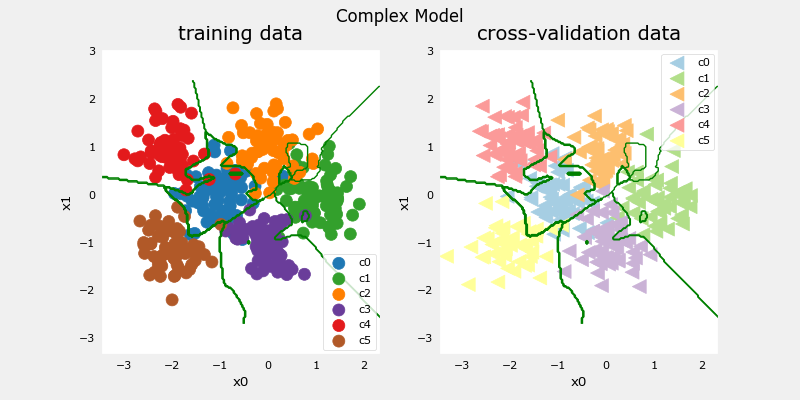

In [35]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [36]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 405us/step
categorization error, training, complex model: 0.007
categorization error, cv,       complex model: 0.100


<a name="5.1"></a>
### 5.1 Simple model
Now, let's try a simple model

<a name="ex04"></a>
### Exercise 4

Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [39]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(6, activation='relu'),  # Input layer with 120 units and ReLU activation
        Dense(6, activation='linear'),  # Hidden layer with 40 units and ReLU activation
    ],
    name="Simple"
)

model_s.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

)


In [40]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 589us/step - loss: 1.8121
Epoch 2/1000
13/13 [==============================] - 0s 471us/step - loss: 1.5012
Epoch 3/1000
13/13 [==============================] - 0s 466us/step - loss: 1.2870
Epoch 4/1000
13/13 [==============================] - 0s 554us/step - loss: 1.0770
Epoch 5/1000
13/13 [==============================] - 0s 449us/step - loss: 0.8853
Epoch 6/1000
13/13 [==============================] - 0s 427us/step - loss: 0.7245
Epoch 7/1000
13/13 [==============================] - 0s 472us/step - loss: 0.6079
Epoch 8/1000
13/13 [==============================] - 0s 409us/step - loss: 0.5180
Epoch 9/1000
13/13 [==============================] - 0s 435us/step - loss: 0.4542
Epoch 10/1000
13/13 [==============================] - 0s 406us/step - loss: 0.4075
Epoch 11/1000
13/13 [==============================] - 0s 476us/step - loss: 0.3726
Epoch 12/1000
13/13 [==============================] - 0s 420us/step - loss: 0.3476
E

13/13 [==============================] - 0s 380us/step - loss: 0.2017
Epoch 99/1000
13/13 [==============================] - 0s 393us/step - loss: 0.1973
Epoch 100/1000
13/13 [==============================] - 0s 378us/step - loss: 0.1997
Epoch 101/1000
13/13 [==============================] - 0s 382us/step - loss: 0.1997
Epoch 102/1000
13/13 [==============================] - 0s 435us/step - loss: 0.2006
Epoch 103/1000
13/13 [==============================] - 0s 378us/step - loss: 0.2017
Epoch 104/1000
13/13 [==============================] - 0s 387us/step - loss: 0.1980
Epoch 105/1000
13/13 [==============================] - 0s 430us/step - loss: 0.1970
Epoch 106/1000
13/13 [==============================] - 0s 398us/step - loss: 0.1969
Epoch 107/1000
13/13 [==============================] - 0s 409us/step - loss: 0.1964
Epoch 108/1000
13/13 [==============================] - 0s 395us/step - loss: 0.1967
Epoch 109/1000
13/13 [==============================] - 0s 408us/step - loss: 0.1

13/13 [==============================] - 0s 420us/step - loss: 0.1937
Epoch 195/1000
13/13 [==============================] - 0s 389us/step - loss: 0.1934
Epoch 196/1000
13/13 [==============================] - 0s 378us/step - loss: 0.1941
Epoch 197/1000
13/13 [==============================] - 0s 401us/step - loss: 0.1950
Epoch 198/1000
13/13 [==============================] - 0s 377us/step - loss: 0.1962
Epoch 199/1000
13/13 [==============================] - 0s 387us/step - loss: 0.1974
Epoch 200/1000
13/13 [==============================] - 0s 454us/step - loss: 0.1944
Epoch 201/1000
13/13 [==============================] - 0s 436us/step - loss: 0.1945
Epoch 202/1000
13/13 [==============================] - 0s 413us/step - loss: 0.1927
Epoch 203/1000
13/13 [==============================] - 0s 444us/step - loss: 0.1938
Epoch 204/1000
13/13 [==============================] - 0s 392us/step - loss: 0.1943
Epoch 205/1000
13/13 [==============================] - 0s 445us/step - loss: 0.

13/13 [==============================] - 0s 412us/step - loss: 0.1930
Epoch 291/1000
13/13 [==============================] - 0s 378us/step - loss: 0.1928
Epoch 292/1000
13/13 [==============================] - 0s 371us/step - loss: 0.1917
Epoch 293/1000
13/13 [==============================] - 0s 419us/step - loss: 0.1933
Epoch 294/1000
13/13 [==============================] - 0s 383us/step - loss: 0.1911
Epoch 295/1000
13/13 [==============================] - 0s 376us/step - loss: 0.1980
Epoch 296/1000
13/13 [==============================] - 0s 424us/step - loss: 0.1922
Epoch 297/1000
13/13 [==============================] - 0s 403us/step - loss: 0.1974
Epoch 298/1000
13/13 [==============================] - 0s 400us/step - loss: 0.1948
Epoch 299/1000
13/13 [==============================] - 0s 409us/step - loss: 0.1926
Epoch 300/1000
13/13 [==============================] - 0s 410us/step - loss: 0.1940
Epoch 301/1000
13/13 [==============================] - 0s 383us/step - loss: 0.

13/13 [==============================] - 0s 376us/step - loss: 0.1926
Epoch 387/1000
13/13 [==============================] - 0s 368us/step - loss: 0.1922
Epoch 388/1000
13/13 [==============================] - 0s 379us/step - loss: 0.1958
Epoch 389/1000
13/13 [==============================] - 0s 419us/step - loss: 0.1956
Epoch 390/1000
13/13 [==============================] - 0s 366us/step - loss: 0.1930
Epoch 391/1000
13/13 [==============================] - 0s 368us/step - loss: 0.1918
Epoch 392/1000
13/13 [==============================] - 0s 428us/step - loss: 0.1914
Epoch 393/1000
13/13 [==============================] - 0s 385us/step - loss: 0.1911
Epoch 394/1000
13/13 [==============================] - 0s 376us/step - loss: 0.1914
Epoch 395/1000
13/13 [==============================] - 0s 431us/step - loss: 0.1916
Epoch 396/1000
13/13 [==============================] - 0s 410us/step - loss: 0.1945
Epoch 397/1000
13/13 [==============================] - 0s 437us/step - loss: 0.

13/13 [==============================] - 0s 368us/step - loss: 0.1928
Epoch 483/1000
13/13 [==============================] - 0s 385us/step - loss: 0.1933
Epoch 484/1000
13/13 [==============================] - 0s 421us/step - loss: 0.1926
Epoch 485/1000
13/13 [==============================] - 0s 381us/step - loss: 0.1940
Epoch 486/1000
13/13 [==============================] - 0s 376us/step - loss: 0.1913
Epoch 487/1000
13/13 [==============================] - 0s 428us/step - loss: 0.1923
Epoch 488/1000
13/13 [==============================] - 0s 436us/step - loss: 0.1933
Epoch 489/1000
13/13 [==============================] - 0s 392us/step - loss: 0.1920
Epoch 490/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1955
Epoch 491/1000
13/13 [==============================] - 0s 427us/step - loss: 0.1933
Epoch 492/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1918
Epoch 493/1000
13/13 [==============================] - 0s 465us/step - loss: 0.

13/13 [==============================] - 0s 426us/step - loss: 0.1917
Epoch 579/1000
13/13 [==============================] - 0s 385us/step - loss: 0.1900
Epoch 580/1000
13/13 [==============================] - 0s 371us/step - loss: 0.1922
Epoch 581/1000
13/13 [==============================] - 0s 408us/step - loss: 0.1918
Epoch 582/1000
13/13 [==============================] - 0s 445us/step - loss: 0.1905
Epoch 583/1000
13/13 [==============================] - 0s 384us/step - loss: 0.1907
Epoch 584/1000
13/13 [==============================] - 0s 442us/step - loss: 0.1920
Epoch 585/1000
13/13 [==============================] - 0s 415us/step - loss: 0.1900
Epoch 586/1000
13/13 [==============================] - 0s 384us/step - loss: 0.1916
Epoch 587/1000
13/13 [==============================] - 0s 426us/step - loss: 0.1914
Epoch 588/1000
13/13 [==============================] - 0s 397us/step - loss: 0.1909
Epoch 589/1000
13/13 [==============================] - 0s 427us/step - loss: 0.

13/13 [==============================] - 0s 408us/step - loss: 0.1924
Epoch 675/1000
13/13 [==============================] - 0s 379us/step - loss: 0.1907
Epoch 676/1000
13/13 [==============================] - 0s 369us/step - loss: 0.1916
Epoch 677/1000
13/13 [==============================] - 0s 390us/step - loss: 0.1915
Epoch 678/1000
13/13 [==============================] - 0s 373us/step - loss: 0.1909
Epoch 679/1000
13/13 [==============================] - 0s 436us/step - loss: 0.1976
Epoch 680/1000
13/13 [==============================] - 0s 413us/step - loss: 0.1913
Epoch 681/1000
13/13 [==============================] - 0s 397us/step - loss: 0.1905
Epoch 682/1000
13/13 [==============================] - 0s 443us/step - loss: 0.1906
Epoch 683/1000
13/13 [==============================] - 0s 396us/step - loss: 0.1943
Epoch 684/1000
13/13 [==============================] - 0s 400us/step - loss: 0.1895
Epoch 685/1000
13/13 [==============================] - 0s 427us/step - loss: 0.

13/13 [==============================] - 0s 394us/step - loss: 0.1905
Epoch 771/1000
13/13 [==============================] - 0s 382us/step - loss: 0.1917
Epoch 772/1000
13/13 [==============================] - 0s 397us/step - loss: 0.1898
Epoch 773/1000
13/13 [==============================] - 0s 370us/step - loss: 0.1917
Epoch 774/1000
13/13 [==============================] - 0s 401us/step - loss: 0.1928
Epoch 775/1000
13/13 [==============================] - 0s 422us/step - loss: 0.1912
Epoch 776/1000
13/13 [==============================] - 0s 430us/step - loss: 0.1899
Epoch 777/1000
13/13 [==============================] - 0s 441us/step - loss: 0.1919
Epoch 778/1000
13/13 [==============================] - 0s 381us/step - loss: 0.1908
Epoch 779/1000
13/13 [==============================] - 0s 484us/step - loss: 0.1925
Epoch 780/1000
13/13 [==============================] - 0s 409us/step - loss: 0.1947
Epoch 781/1000
13/13 [==============================] - 0s 394us/step - loss: 0.

13/13 [==============================] - 0s 417us/step - loss: 0.1930
Epoch 867/1000
13/13 [==============================] - 0s 369us/step - loss: 0.1905
Epoch 868/1000
13/13 [==============================] - 0s 375us/step - loss: 0.1930
Epoch 869/1000
13/13 [==============================] - 0s 430us/step - loss: 0.1896
Epoch 870/1000
13/13 [==============================] - 0s 386us/step - loss: 0.1913
Epoch 871/1000
13/13 [==============================] - 0s 374us/step - loss: 0.1908
Epoch 872/1000
13/13 [==============================] - 0s 423us/step - loss: 0.1900
Epoch 873/1000
13/13 [==============================] - 0s 425us/step - loss: 0.1920
Epoch 874/1000
13/13 [==============================] - 0s 415us/step - loss: 0.1903
Epoch 875/1000
13/13 [==============================] - 0s 417us/step - loss: 0.1905
Epoch 876/1000
13/13 [==============================] - 0s 404us/step - loss: 0.1900
Epoch 877/1000
13/13 [==============================] - 0s 442us/step - loss: 0.

13/13 [==============================] - 0s 424us/step - loss: 0.1911
Epoch 963/1000
13/13 [==============================] - 0s 384us/step - loss: 0.1962
Epoch 964/1000
13/13 [==============================] - 0s 373us/step - loss: 0.1898
Epoch 965/1000
13/13 [==============================] - 0s 427us/step - loss: 0.1923
Epoch 966/1000
13/13 [==============================] - 0s 370us/step - loss: 0.1904
Epoch 967/1000
13/13 [==============================] - 0s 374us/step - loss: 0.1909
Epoch 968/1000
13/13 [==============================] - 0s 425us/step - loss: 0.1922
Epoch 969/1000
13/13 [==============================] - 0s 412us/step - loss: 0.1920
Epoch 970/1000
13/13 [==============================] - 0s 394us/step - loss: 0.1905
Epoch 971/1000
13/13 [==============================] - 0s 473us/step - loss: 0.1895
Epoch 972/1000
13/13 [==============================] - 0s 403us/step - loss: 0.1902
Epoch 973/1000
13/13 [==============================] - 0s 418us/step - loss: 0.

In [41]:
# BEGIN UNIT TEST
model_s.summary()

model_s_test(model_s, classes, X_train.shape[1])
# END UNIT TEST

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 6)                 18        
                                                                 
 dense_33 (Dense)            (None, 6)                 42        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


AssertionError: Wrong loss function. Expected <class 'keras.optimizers.adam.Adam'>, but got <keras.optimizers.legacy.adam.Adam object at 0x2913b7ac0>

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 6)                 18        
_________________________________________________________________
L2 (Dense)                   (None, 6)                 42        
=================================================================
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(6, activation = 'relu', name="L1"),            # @REPLACE
        Dense(classes, activation = 'linear', name="L2")     # @REPLACE
    ], name = "Simple"
)
model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # @REPLACE
    optimizer=tf.keras.optimizers.Adam(0.01),     # @REPLACE
)

model_s.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 0s 217us/step


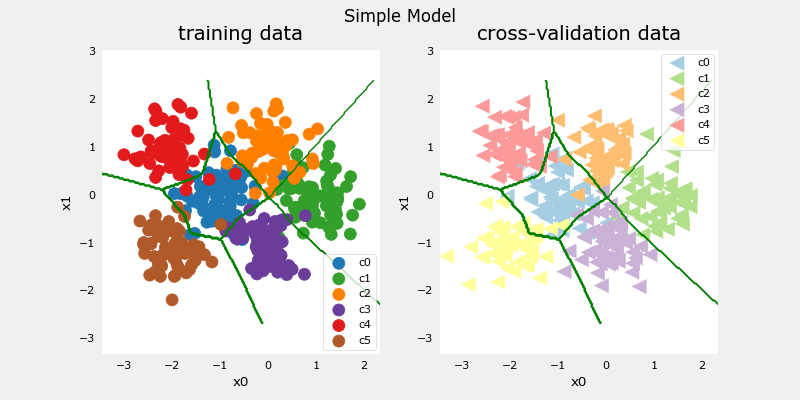

In [42]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [43]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 398us/step
categorization error, training, simple model, 0.065, complex model: 0.007
categorization error, cv,       simple model, 0.072, complex model: 0.100


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

<a name="6"></a>
## 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

<a name="ex05"></a>
### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [54]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),  # Input layer with 120 units, ReLU activation, and L2 regularization
        Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),  # Hidden layer with 40 units, ReLU activation, and L2 regularization
        Dense(6, activation="linear")  # Output layer with 6 units and linear activation (from_logits=True)
    ], name= "ComplexRegularlized"
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)



In [55]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 745us/step - loss: 4.3682
Epoch 2/1000
13/13 [==============================] - 0s 620us/step - loss: 1.6473
Epoch 3/1000
13/13 [==============================] - 0s 667us/step - loss: 1.2767
Epoch 4/1000
13/13 [==============================] - 0s 543us/step - loss: 1.0396
Epoch 5/1000
13/13 [==============================] - 0s 584us/step - loss: 0.9740
Epoch 6/1000
13/13 [==============================] - 0s 649us/step - loss: 0.9387
Epoch 7/1000
13/13 [==============================] - 0s 594us/step - loss: 0.9354
Epoch 8/1000
13/13 [==============================] - 0s 676us/step - loss: 0.8621
Epoch 9/1000
13/13 [==============================] - 0s 649us/step - loss: 0.7942
Epoch 10/1000
13/13 [==============================] - 0s 619us/step - loss: 0.7638
Epoch 11/1000
13/13 [==============================] - 0s 604us/step - loss: 0.7478
Epoch 12/1000
13/13 [==============================] - 0s 562us/step - loss: 0.7447
E

13/13 [==============================] - 0s 520us/step - loss: 0.4651
Epoch 99/1000
13/13 [==============================] - 0s 518us/step - loss: 0.5034
Epoch 100/1000
13/13 [==============================] - 0s 507us/step - loss: 0.5036
Epoch 101/1000
13/13 [==============================] - 0s 580us/step - loss: 0.4980
Epoch 102/1000
13/13 [==============================] - 0s 535us/step - loss: 0.4796
Epoch 103/1000
13/13 [==============================] - 0s 528us/step - loss: 0.4770
Epoch 104/1000
13/13 [==============================] - 0s 553us/step - loss: 0.4655
Epoch 105/1000
13/13 [==============================] - 0s 544us/step - loss: 0.5160
Epoch 106/1000
13/13 [==============================] - 0s 606us/step - loss: 0.4678
Epoch 107/1000
13/13 [==============================] - 0s 579us/step - loss: 0.4597
Epoch 108/1000
13/13 [==============================] - 0s 586us/step - loss: 0.4653
Epoch 109/1000
13/13 [==============================] - 0s 585us/step - loss: 0.4

13/13 [==============================] - 0s 504us/step - loss: 0.4171
Epoch 195/1000
13/13 [==============================] - 0s 559us/step - loss: 0.4022
Epoch 196/1000
13/13 [==============================] - 0s 484us/step - loss: 0.3941
Epoch 197/1000
13/13 [==============================] - 0s 533us/step - loss: 0.4196
Epoch 198/1000
13/13 [==============================] - 0s 601us/step - loss: 0.3954
Epoch 199/1000
13/13 [==============================] - 0s 559us/step - loss: 0.4051
Epoch 200/1000
13/13 [==============================] - 0s 507us/step - loss: 0.4051
Epoch 201/1000
13/13 [==============================] - 0s 587us/step - loss: 0.4285
Epoch 202/1000
13/13 [==============================] - 0s 546us/step - loss: 0.3950
Epoch 203/1000
13/13 [==============================] - 0s 590us/step - loss: 0.3980
Epoch 204/1000
13/13 [==============================] - 0s 574us/step - loss: 0.4026
Epoch 205/1000
13/13 [==============================] - 0s 577us/step - loss: 0.

13/13 [==============================] - 0s 564us/step - loss: 0.3812
Epoch 291/1000
13/13 [==============================] - 0s 519us/step - loss: 0.3855
Epoch 292/1000
13/13 [==============================] - 0s 565us/step - loss: 0.3629
Epoch 293/1000
13/13 [==============================] - 0s 540us/step - loss: 0.3743
Epoch 294/1000
13/13 [==============================] - 0s 510us/step - loss: 0.3921
Epoch 295/1000
13/13 [==============================] - 0s 567us/step - loss: 0.4172
Epoch 296/1000
13/13 [==============================] - 0s 548us/step - loss: 0.3832
Epoch 297/1000
13/13 [==============================] - 0s 526us/step - loss: 0.3870
Epoch 298/1000
13/13 [==============================] - 0s 613us/step - loss: 0.3997
Epoch 299/1000
13/13 [==============================] - 0s 563us/step - loss: 0.3932
Epoch 300/1000
13/13 [==============================] - 0s 530us/step - loss: 0.4295
Epoch 301/1000
13/13 [==============================] - 0s 546us/step - loss: 0.

13/13 [==============================] - 0s 608us/step - loss: 0.3538
Epoch 387/1000
13/13 [==============================] - 0s 524us/step - loss: 0.3750
Epoch 388/1000
13/13 [==============================] - 0s 522us/step - loss: 0.3732
Epoch 389/1000
13/13 [==============================] - 0s 601us/step - loss: 0.3625
Epoch 390/1000
13/13 [==============================] - 0s 603us/step - loss: 0.3482
Epoch 391/1000
13/13 [==============================] - 0s 630us/step - loss: 0.3622
Epoch 392/1000
13/13 [==============================] - 0s 602us/step - loss: 0.3766
Epoch 393/1000
13/13 [==============================] - 0s 535us/step - loss: 0.3563
Epoch 394/1000
13/13 [==============================] - 0s 633us/step - loss: 0.3586
Epoch 395/1000
13/13 [==============================] - 0s 575us/step - loss: 0.3862
Epoch 396/1000
13/13 [==============================] - 0s 567us/step - loss: 0.3786
Epoch 397/1000
13/13 [==============================] - 0s 549us/step - loss: 0.

13/13 [==============================] - 0s 594us/step - loss: 0.3717
Epoch 483/1000
13/13 [==============================] - 0s 526us/step - loss: 0.3777
Epoch 484/1000
13/13 [==============================] - 0s 585us/step - loss: 0.3713
Epoch 485/1000
13/13 [==============================] - 0s 536us/step - loss: 0.3797
Epoch 486/1000
13/13 [==============================] - 0s 543us/step - loss: 0.3514
Epoch 487/1000
13/13 [==============================] - 0s 556us/step - loss: 0.3406
Epoch 488/1000
13/13 [==============================] - 0s 578us/step - loss: 0.3477
Epoch 489/1000
13/13 [==============================] - 0s 608us/step - loss: 0.3348
Epoch 490/1000
13/13 [==============================] - 0s 547us/step - loss: 0.3500
Epoch 491/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3619
Epoch 492/1000
13/13 [==============================] - 0s 538us/step - loss: 0.3654
Epoch 493/1000
13/13 [==============================] - 0s 640us/step - loss: 0.

13/13 [==============================] - 0s 531us/step - loss: 0.4162
Epoch 579/1000
13/13 [==============================] - 0s 578us/step - loss: 0.3538
Epoch 580/1000
13/13 [==============================] - 0s 498us/step - loss: 0.3315
Epoch 581/1000
13/13 [==============================] - 0s 527us/step - loss: 0.3503
Epoch 582/1000
13/13 [==============================] - 0s 573us/step - loss: 0.3474
Epoch 583/1000
13/13 [==============================] - 0s 576us/step - loss: 0.3523
Epoch 584/1000
13/13 [==============================] - 0s 545us/step - loss: 0.3671
Epoch 585/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3865
Epoch 586/1000
13/13 [==============================] - 0s 545us/step - loss: 0.3631
Epoch 587/1000
13/13 [==============================] - 0s 566us/step - loss: 0.3479
Epoch 588/1000
13/13 [==============================] - 0s 546us/step - loss: 0.3307
Epoch 589/1000
13/13 [==============================] - 0s 602us/step - loss: 0.

13/13 [==============================] - 0s 504us/step - loss: 0.4033
Epoch 675/1000
13/13 [==============================] - 0s 600us/step - loss: 0.3764
Epoch 676/1000
13/13 [==============================] - 0s 542us/step - loss: 0.3515
Epoch 677/1000
13/13 [==============================] - 0s 513us/step - loss: 0.3307
Epoch 678/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3286
Epoch 679/1000
13/13 [==============================] - 0s 597us/step - loss: 0.3334
Epoch 680/1000
13/13 [==============================] - 0s 540us/step - loss: 0.3335
Epoch 681/1000
13/13 [==============================] - 0s 601us/step - loss: 0.3485
Epoch 682/1000
13/13 [==============================] - 0s 531us/step - loss: 0.3317
Epoch 683/1000
13/13 [==============================] - 0s 573us/step - loss: 0.3314
Epoch 684/1000
13/13 [==============================] - 0s 566us/step - loss: 0.3452
Epoch 685/1000
13/13 [==============================] - 0s 588us/step - loss: 0.

13/13 [==============================] - 0s 564us/step - loss: 0.3273
Epoch 771/1000
13/13 [==============================] - 0s 544us/step - loss: 0.3275
Epoch 772/1000
13/13 [==============================] - 0s 534us/step - loss: 0.3312
Epoch 773/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3672
Epoch 774/1000
13/13 [==============================] - 0s 594us/step - loss: 0.3750
Epoch 775/1000
13/13 [==============================] - 0s 558us/step - loss: 0.3375
Epoch 776/1000
13/13 [==============================] - 0s 572us/step - loss: 0.3657
Epoch 777/1000
13/13 [==============================] - 0s 551us/step - loss: 0.3615
Epoch 778/1000
13/13 [==============================] - 0s 598us/step - loss: 0.3206
Epoch 779/1000
13/13 [==============================] - 0s 540us/step - loss: 0.3276
Epoch 780/1000
13/13 [==============================] - 0s 582us/step - loss: 0.3391
Epoch 781/1000
13/13 [==============================] - 0s 572us/step - loss: 0.

13/13 [==============================] - 0s 570us/step - loss: 0.3777
Epoch 867/1000
13/13 [==============================] - 0s 553us/step - loss: 0.3287
Epoch 868/1000
13/13 [==============================] - 0s 513us/step - loss: 0.3477
Epoch 869/1000
13/13 [==============================] - 0s 581us/step - loss: 0.3421
Epoch 870/1000
13/13 [==============================] - 0s 555us/step - loss: 0.3476
Epoch 871/1000
13/13 [==============================] - 0s 606us/step - loss: 0.3417
Epoch 872/1000
13/13 [==============================] - 0s 543us/step - loss: 0.3247
Epoch 873/1000
13/13 [==============================] - 0s 577us/step - loss: 0.3193
Epoch 874/1000
13/13 [==============================] - 0s 536us/step - loss: 0.3432
Epoch 875/1000
13/13 [==============================] - 0s 570us/step - loss: 0.3445
Epoch 876/1000
13/13 [==============================] - 0s 530us/step - loss: 0.3383
Epoch 877/1000
13/13 [==============================] - 0s 605us/step - loss: 0.

13/13 [==============================] - 0s 537us/step - loss: 0.3164
Epoch 963/1000
13/13 [==============================] - 0s 616us/step - loss: 0.3381
Epoch 964/1000
13/13 [==============================] - 0s 537us/step - loss: 0.3160
Epoch 965/1000
13/13 [==============================] - 0s 653us/step - loss: 0.3158
Epoch 966/1000
13/13 [==============================] - 0s 565us/step - loss: 0.3302
Epoch 967/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3230
Epoch 968/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3323
Epoch 969/1000
13/13 [==============================] - 0s 574us/step - loss: 0.3790
Epoch 970/1000
13/13 [==============================] - 0s 558us/step - loss: 0.3780
Epoch 971/1000
13/13 [==============================] - 0s 577us/step - loss: 0.3487
Epoch 972/1000
13/13 [==============================] - 0s 566us/step - loss: 0.3359
Epoch 973/1000
13/13 [==============================] - 0s 592us/step - loss: 0.

In [56]:
# BEGIN UNIT TEST
model_r.summary()

model_r_test(model_r, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "ComplexRegularlized"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 120)               360       
                                                                 
 dense_47 (Dense)            (None, 40)                4840      
                                                                 
 dense_48 (Dense)            (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
ddd


AssertionError: Wrong loss function. Expected <class 'keras.optimizers.adam.Adam'>, but got <keras.optimizers.legacy.adam.Adam object at 0x28fbf0bb0>

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "ComplexRegularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"), 
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),  
        Dense(classes, activation = 'linear', name="L3")  
    ], name="ComplexRegularized"
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.01),                             
)

model_r.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 0s 235us/step


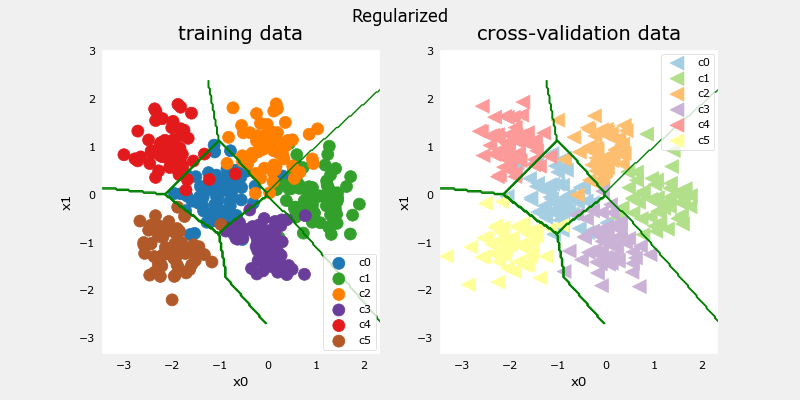

In [57]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

The results look very similar to the 'ideal' model. Let's check classification error.

In [58]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 882us/step
categorization error, training, regularized: 0.060, simple model, 0.065, complex model: 0.007
categorization error, cv,       regularized: 0.069, simple model, 0.072, complex model: 0.100


The simple model is a bit better in the training set than the regularized model but it worse in the cross validation set.

<a name="7"></a>
## 7 - Iterate to find optimal regularization value
As you did in linear regression, you can try many regularization values. This code takes several minutes to run. If you have time, you can run it and check the results. If not, you have completed the graded parts of the assignment!

In [59]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 [==============================] - 0s 633us/step - loss: 1.0001
Epoch 2/1000
13/13 [==============================] - 0s 632us/step - loss: 0.4215
Epoch 3/1000
13/13 [==============================] - 0s 685us/step - loss: 0.3264
Epoch 4/1000
13/13 [==============================] - 0s 522us/step - loss: 0.2881
Epoch 5/1000
13/13 [==============================] - 0s 620us/step - loss: 0.2772
Epoch 6/1000
13/13 [==============================] - 0s 524us/step - loss: 0.2993
Epoch 7/1000
13/13 [==============================] - 0s 611us/step - loss: 0.2502
Epoch 8/1000
13/13 [==============================] - 0s 562us/step - loss: 0.2211
Epoch 9/1000
13/13 [==============================] - 0s 629us/step - loss: 0.2236
Epoch 10/1000
13/13 [==============================] - 0s 542us/step - loss: 0.2030
Epoch 11/1000
13/13 [==============================] - 0s 629us/step - loss: 0.2142
Epoch 12/1000
13/13 [==============================] - 0s 588us/step - loss: 0.2017
E

13/13 [==============================] - 0s 540us/step - loss: 0.2019
Epoch 99/1000
13/13 [==============================] - 0s 573us/step - loss: 0.1806
Epoch 100/1000
13/13 [==============================] - 0s 575us/step - loss: 0.1627
Epoch 101/1000
13/13 [==============================] - 0s 493us/step - loss: 0.1579
Epoch 102/1000
13/13 [==============================] - 0s 533us/step - loss: 0.1586
Epoch 103/1000
13/13 [==============================] - 0s 615us/step - loss: 0.1810
Epoch 104/1000
13/13 [==============================] - 0s 605us/step - loss: 0.1539
Epoch 105/1000
13/13 [==============================] - 0s 549us/step - loss: 0.1433
Epoch 106/1000
13/13 [==============================] - 0s 527us/step - loss: 0.1372
Epoch 107/1000
13/13 [==============================] - 0s 599us/step - loss: 0.1501
Epoch 108/1000
13/13 [==============================] - 0s 584us/step - loss: 0.1401
Epoch 109/1000
13/13 [==============================] - 0s 577us/step - loss: 0.1

13/13 [==============================] - 0s 514us/step - loss: 0.0931
Epoch 195/1000
13/13 [==============================] - 0s 546us/step - loss: 0.1018
Epoch 196/1000
13/13 [==============================] - 0s 505us/step - loss: 0.1081
Epoch 197/1000
13/13 [==============================] - 0s 571us/step - loss: 0.0996
Epoch 198/1000
13/13 [==============================] - 0s 523us/step - loss: 0.1083
Epoch 199/1000
13/13 [==============================] - 0s 561us/step - loss: 0.1116
Epoch 200/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1243
Epoch 201/1000
13/13 [==============================] - 0s 571us/step - loss: 0.1191
Epoch 202/1000
13/13 [==============================] - 0s 658us/step - loss: 0.1049
Epoch 203/1000
13/13 [==============================] - 0s 621us/step - loss: 0.0971
Epoch 204/1000
13/13 [==============================] - 0s 598us/step - loss: 0.1119
Epoch 205/1000
13/13 [==============================] - 0s 546us/step - loss: 0.

13/13 [==============================] - 0s 484us/step - loss: 0.0949
Epoch 293/1000
13/13 [==============================] - 0s 471us/step - loss: 0.0847
Epoch 294/1000
13/13 [==============================] - 0s 486us/step - loss: 0.0829
Epoch 295/1000
13/13 [==============================] - 0s 501us/step - loss: 0.0897
Epoch 296/1000
13/13 [==============================] - 0s 482us/step - loss: 0.0974
Epoch 297/1000
13/13 [==============================] - 0s 487us/step - loss: 0.0868
Epoch 298/1000
13/13 [==============================] - 0s 477us/step - loss: 0.0848
Epoch 299/1000
13/13 [==============================] - 0s 488us/step - loss: 0.0754
Epoch 300/1000
13/13 [==============================] - 0s 486us/step - loss: 0.0736
Epoch 301/1000
13/13 [==============================] - 0s 491us/step - loss: 0.0734
Epoch 302/1000
13/13 [==============================] - 0s 473us/step - loss: 0.0821
Epoch 303/1000
13/13 [==============================] - 0s 484us/step - loss: 0.

13/13 [==============================] - 0s 469us/step - loss: 0.0899
Epoch 389/1000
13/13 [==============================] - 0s 477us/step - loss: 0.1193
Epoch 390/1000
13/13 [==============================] - 0s 462us/step - loss: 0.1016
Epoch 391/1000
13/13 [==============================] - 0s 484us/step - loss: 0.1095
Epoch 392/1000
13/13 [==============================] - 0s 486us/step - loss: 0.0731
Epoch 393/1000
13/13 [==============================] - 0s 468us/step - loss: 0.0693
Epoch 394/1000
13/13 [==============================] - 0s 478us/step - loss: 0.0718
Epoch 395/1000
13/13 [==============================] - 0s 473us/step - loss: 0.0672
Epoch 396/1000
13/13 [==============================] - 0s 466us/step - loss: 0.0594
Epoch 397/1000
13/13 [==============================] - 0s 460us/step - loss: 0.0618
Epoch 398/1000
13/13 [==============================] - 0s 468us/step - loss: 0.0618
Epoch 399/1000
13/13 [==============================] - 0s 483us/step - loss: 0.

13/13 [==============================] - 0s 515us/step - loss: 0.1286
Epoch 485/1000
13/13 [==============================] - 0s 572us/step - loss: 0.1512
Epoch 486/1000
13/13 [==============================] - 0s 503us/step - loss: 0.1171
Epoch 487/1000
13/13 [==============================] - 0s 572us/step - loss: 0.0962
Epoch 488/1000
13/13 [==============================] - 0s 542us/step - loss: 0.0629
Epoch 489/1000
13/13 [==============================] - 0s 559us/step - loss: 0.0627
Epoch 490/1000
13/13 [==============================] - 0s 556us/step - loss: 0.0815
Epoch 491/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0557
Epoch 492/1000
13/13 [==============================] - 0s 591us/step - loss: 0.0738
Epoch 493/1000
13/13 [==============================] - 0s 541us/step - loss: 0.0561
Epoch 494/1000
13/13 [==============================] - 0s 602us/step - loss: 0.0533
Epoch 495/1000
13/13 [==============================] - 0s 551us/step - loss: 0.

13/13 [==============================] - 0s 555us/step - loss: 0.0242
Epoch 581/1000
13/13 [==============================] - 0s 504us/step - loss: 0.0272
Epoch 582/1000
13/13 [==============================] - 0s 529us/step - loss: 0.0283
Epoch 583/1000
13/13 [==============================] - 0s 498us/step - loss: 0.0309
Epoch 584/1000
13/13 [==============================] - 0s 586us/step - loss: 0.0318
Epoch 585/1000
13/13 [==============================] - 0s 584us/step - loss: 0.0301
Epoch 586/1000
13/13 [==============================] - 0s 525us/step - loss: 0.0306
Epoch 587/1000
13/13 [==============================] - 0s 578us/step - loss: 0.0276
Epoch 588/1000
13/13 [==============================] - 0s 526us/step - loss: 0.0254
Epoch 589/1000
13/13 [==============================] - 0s 556us/step - loss: 0.0246
Epoch 590/1000
13/13 [==============================] - 0s 528us/step - loss: 0.0276
Epoch 591/1000
13/13 [==============================] - 0s 573us/step - loss: 0.

13/13 [==============================] - 0s 556us/step - loss: 0.0340
Epoch 677/1000
13/13 [==============================] - 0s 513us/step - loss: 0.0244
Epoch 678/1000
13/13 [==============================] - 0s 540us/step - loss: 0.0292
Epoch 679/1000
13/13 [==============================] - 0s 513us/step - loss: 0.0223
Epoch 680/1000
13/13 [==============================] - 0s 555us/step - loss: 0.0311
Epoch 681/1000
13/13 [==============================] - 0s 542us/step - loss: 0.0362
Epoch 682/1000
13/13 [==============================] - 0s 624us/step - loss: 0.0327
Epoch 683/1000
13/13 [==============================] - 0s 541us/step - loss: 0.0414
Epoch 684/1000
13/13 [==============================] - 0s 587us/step - loss: 0.0293
Epoch 685/1000
13/13 [==============================] - 0s 582us/step - loss: 0.0263
Epoch 686/1000
13/13 [==============================] - 0s 535us/step - loss: 0.0213
Epoch 687/1000
13/13 [==============================] - 0s 570us/step - loss: 0.

13/13 [==============================] - 0s 502us/step - loss: 0.0384
Epoch 773/1000
13/13 [==============================] - 0s 572us/step - loss: 0.0378
Epoch 774/1000
13/13 [==============================] - 0s 500us/step - loss: 0.0323
Epoch 775/1000
13/13 [==============================] - 0s 550us/step - loss: 0.0299
Epoch 776/1000
13/13 [==============================] - 0s 626us/step - loss: 0.0256
Epoch 777/1000
13/13 [==============================] - 0s 550us/step - loss: 0.0287
Epoch 778/1000
13/13 [==============================] - 0s 549us/step - loss: 0.0612
Epoch 779/1000
13/13 [==============================] - 0s 591us/step - loss: 0.0352
Epoch 780/1000
13/13 [==============================] - 0s 522us/step - loss: 0.0448
Epoch 781/1000
13/13 [==============================] - 0s 563us/step - loss: 0.0372
Epoch 782/1000
13/13 [==============================] - 0s 534us/step - loss: 0.0323
Epoch 783/1000
13/13 [==============================] - 0s 565us/step - loss: 0.

13/13 [==============================] - 0s 511us/step - loss: 0.0150
Epoch 869/1000
13/13 [==============================] - 0s 527us/step - loss: 0.0165
Epoch 870/1000
13/13 [==============================] - 0s 532us/step - loss: 0.0287
Epoch 871/1000
13/13 [==============================] - 0s 521us/step - loss: 0.0317
Epoch 872/1000
13/13 [==============================] - 0s 601us/step - loss: 0.0152
Epoch 873/1000
13/13 [==============================] - 0s 531us/step - loss: 0.0133
Epoch 874/1000
13/13 [==============================] - 0s 543us/step - loss: 0.0128
Epoch 875/1000
13/13 [==============================] - 0s 585us/step - loss: 0.0140
Epoch 876/1000
13/13 [==============================] - 0s 552us/step - loss: 0.0117
Epoch 877/1000
13/13 [==============================] - 0s 562us/step - loss: 0.0108
Epoch 878/1000
13/13 [==============================] - 0s 560us/step - loss: 0.0127
Epoch 879/1000
13/13 [==============================] - 0s 554us/step - loss: 0.

13/13 [==============================] - 0s 520us/step - loss: 0.0312
Epoch 965/1000
13/13 [==============================] - 0s 542us/step - loss: 0.0347
Epoch 966/1000
13/13 [==============================] - 0s 486us/step - loss: 0.0274
Epoch 967/1000
13/13 [==============================] - 0s 562us/step - loss: 0.0374
Epoch 968/1000
13/13 [==============================] - 0s 552us/step - loss: 0.0380
Epoch 969/1000
13/13 [==============================] - 0s 571us/step - loss: 0.0273
Epoch 970/1000
13/13 [==============================] - 0s 581us/step - loss: 0.0263
Epoch 971/1000
13/13 [==============================] - 0s 548us/step - loss: 0.0208
Epoch 972/1000
13/13 [==============================] - 0s 561us/step - loss: 0.0183
Epoch 973/1000
13/13 [==============================] - 0s 548us/step - loss: 0.0226
Epoch 974/1000
13/13 [==============================] - 0s 526us/step - loss: 0.0193
Epoch 975/1000
13/13 [==============================] - 0s 561us/step - loss: 0.

Finished lambda = 0.0
Epoch 1/1000
13/13 [==============================] - 0s 631us/step - loss: 1.1153
Epoch 2/1000
13/13 [==============================] - 0s 621us/step - loss: 0.4877
Epoch 3/1000
13/13 [==============================] - 0s 601us/step - loss: 0.4032
Epoch 4/1000
13/13 [==============================] - 0s 531us/step - loss: 0.3515
Epoch 5/1000
13/13 [==============================] - 0s 577us/step - loss: 0.3380
Epoch 6/1000
13/13 [==============================] - 0s 549us/step - loss: 0.3576
Epoch 7/1000
13/13 [==============================] - 0s 542us/step - loss: 0.3155
Epoch 8/1000
13/13 [==============================] - 0s 588us/step - loss: 0.2994
Epoch 9/1000
13/13 [==============================] - 0s 548us/step - loss: 0.2938
Epoch 10/1000
13/13 [==============================] - 0s 534us/step - loss: 0.2692
Epoch 11/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2766
Epoch 12/1000
13/13 [==============================] - 0s 530us

13/13 [==============================] - 0s 567us/step - loss: 0.2597
Epoch 99/1000
13/13 [==============================] - 0s 521us/step - loss: 0.2439
Epoch 100/1000
13/13 [==============================] - 0s 539us/step - loss: 0.2185
Epoch 101/1000
13/13 [==============================] - 0s 508us/step - loss: 0.2351
Epoch 102/1000
13/13 [==============================] - 0s 567us/step - loss: 0.2285
Epoch 103/1000
13/13 [==============================] - 0s 533us/step - loss: 0.2546
Epoch 104/1000
13/13 [==============================] - 0s 555us/step - loss: 0.2372
Epoch 105/1000
13/13 [==============================] - 0s 569us/step - loss: 0.2239
Epoch 106/1000
13/13 [==============================] - 0s 535us/step - loss: 0.2210
Epoch 107/1000
13/13 [==============================] - 0s 562us/step - loss: 0.2306
Epoch 108/1000
13/13 [==============================] - 0s 560us/step - loss: 0.2151
Epoch 109/1000
13/13 [==============================] - 0s 578us/step - loss: 0.2

13/13 [==============================] - 0s 507us/step - loss: 0.2060
Epoch 195/1000
13/13 [==============================] - 0s 513us/step - loss: 0.1945
Epoch 196/1000
13/13 [==============================] - 0s 533us/step - loss: 0.1955
Epoch 197/1000
13/13 [==============================] - 0s 626us/step - loss: 0.2074
Epoch 198/1000
13/13 [==============================] - 0s 538us/step - loss: 0.2010
Epoch 199/1000
13/13 [==============================] - 0s 552us/step - loss: 0.2170
Epoch 200/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2033
Epoch 201/1000
13/13 [==============================] - 0s 603us/step - loss: 0.1976
Epoch 202/1000
13/13 [==============================] - 0s 582us/step - loss: 0.1975
Epoch 203/1000
13/13 [==============================] - 0s 566us/step - loss: 0.1919
Epoch 204/1000
13/13 [==============================] - 0s 615us/step - loss: 0.2182
Epoch 205/1000
13/13 [==============================] - 0s 561us/step - loss: 0.

13/13 [==============================] - 0s 526us/step - loss: 0.2043
Epoch 291/1000
13/13 [==============================] - 0s 526us/step - loss: 0.1918
Epoch 292/1000
13/13 [==============================] - 0s 528us/step - loss: 0.1814
Epoch 293/1000
13/13 [==============================] - 0s 587us/step - loss: 0.1859
Epoch 294/1000
13/13 [==============================] - 0s 546us/step - loss: 0.1856
Epoch 295/1000
13/13 [==============================] - 0s 566us/step - loss: 0.1911
Epoch 296/1000
13/13 [==============================] - 0s 572us/step - loss: 0.1952
Epoch 297/1000
13/13 [==============================] - 0s 607us/step - loss: 0.1859
Epoch 298/1000
13/13 [==============================] - 0s 554us/step - loss: 0.1979
Epoch 299/1000
13/13 [==============================] - 0s 569us/step - loss: 0.1869
Epoch 300/1000
13/13 [==============================] - 0s 565us/step - loss: 0.1951
Epoch 301/1000
13/13 [==============================] - 0s 588us/step - loss: 0.

13/13 [==============================] - 0s 582us/step - loss: 0.1801
Epoch 387/1000
13/13 [==============================] - 0s 511us/step - loss: 0.1773
Epoch 388/1000
13/13 [==============================] - 0s 527us/step - loss: 0.1786
Epoch 389/1000
13/13 [==============================] - 0s 581us/step - loss: 0.1863
Epoch 390/1000
13/13 [==============================] - 0s 489us/step - loss: 0.1912
Epoch 391/1000
13/13 [==============================] - 0s 570us/step - loss: 0.1839
Epoch 392/1000
13/13 [==============================] - 0s 563us/step - loss: 0.1738
Epoch 393/1000
13/13 [==============================] - 0s 580us/step - loss: 0.1744
Epoch 394/1000
13/13 [==============================] - 0s 561us/step - loss: 0.1715
Epoch 395/1000
13/13 [==============================] - 0s 560us/step - loss: 0.1830
Epoch 396/1000
13/13 [==============================] - 0s 550us/step - loss: 0.1794
Epoch 397/1000
13/13 [==============================] - 0s 579us/step - loss: 0.

13/13 [==============================] - 0s 514us/step - loss: 0.1708
Epoch 483/1000
13/13 [==============================] - 0s 526us/step - loss: 0.1732
Epoch 484/1000
13/13 [==============================] - 0s 534us/step - loss: 0.1830
Epoch 485/1000
13/13 [==============================] - 0s 560us/step - loss: 0.1718
Epoch 486/1000
13/13 [==============================] - 0s 512us/step - loss: 0.1702
Epoch 487/1000
13/13 [==============================] - 0s 593us/step - loss: 0.1713
Epoch 488/1000
13/13 [==============================] - 0s 541us/step - loss: 0.1647
Epoch 489/1000
13/13 [==============================] - 0s 568us/step - loss: 0.1681
Epoch 490/1000
13/13 [==============================] - 0s 569us/step - loss: 0.1780
Epoch 491/1000
13/13 [==============================] - 0s 569us/step - loss: 0.1694
Epoch 492/1000
13/13 [==============================] - 0s 538us/step - loss: 0.1726
Epoch 493/1000
13/13 [==============================] - 0s 597us/step - loss: 0.

13/13 [==============================] - 0s 591us/step - loss: 0.1639
Epoch 579/1000
13/13 [==============================] - 0s 564us/step - loss: 0.1571
Epoch 580/1000
13/13 [==============================] - 0s 508us/step - loss: 0.1722
Epoch 581/1000
13/13 [==============================] - 0s 578us/step - loss: 0.1626
Epoch 582/1000
13/13 [==============================] - 0s 610us/step - loss: 0.1559
Epoch 583/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1634
Epoch 584/1000
13/13 [==============================] - 0s 591us/step - loss: 0.1714
Epoch 585/1000
13/13 [==============================] - 0s 585us/step - loss: 0.1625
Epoch 586/1000
13/13 [==============================] - 0s 592us/step - loss: 0.1684
Epoch 587/1000
13/13 [==============================] - 0s 615us/step - loss: 0.1647
Epoch 588/1000
13/13 [==============================] - 0s 586us/step - loss: 0.1587
Epoch 589/1000
13/13 [==============================] - 0s 576us/step - loss: 0.

13/13 [==============================] - 0s 514us/step - loss: 0.1736
Epoch 675/1000
13/13 [==============================] - 0s 502us/step - loss: 0.1692
Epoch 676/1000
13/13 [==============================] - 0s 537us/step - loss: 0.1628
Epoch 677/1000
13/13 [==============================] - 0s 509us/step - loss: 0.1593
Epoch 678/1000
13/13 [==============================] - 0s 630us/step - loss: 0.1637
Epoch 679/1000
13/13 [==============================] - 0s 558us/step - loss: 0.1729
Epoch 680/1000
13/13 [==============================] - 0s 546us/step - loss: 0.1712
Epoch 681/1000
13/13 [==============================] - 0s 548us/step - loss: 0.1775
Epoch 682/1000
13/13 [==============================] - 0s 576us/step - loss: 0.1772
Epoch 683/1000
13/13 [==============================] - 0s 576us/step - loss: 0.1661
Epoch 684/1000
13/13 [==============================] - 0s 569us/step - loss: 0.1588
Epoch 685/1000
13/13 [==============================] - 0s 551us/step - loss: 0.

13/13 [==============================] - 0s 559us/step - loss: 0.1517
Epoch 771/1000
13/13 [==============================] - 0s 524us/step - loss: 0.1542
Epoch 772/1000
13/13 [==============================] - 0s 557us/step - loss: 0.1496
Epoch 773/1000
13/13 [==============================] - 0s 504us/step - loss: 0.1525
Epoch 774/1000
13/13 [==============================] - 0s 517us/step - loss: 0.1609
Epoch 775/1000
13/13 [==============================] - 0s 582us/step - loss: 0.1637
Epoch 776/1000
13/13 [==============================] - 0s 582us/step - loss: 0.1558
Epoch 777/1000
13/13 [==============================] - 0s 548us/step - loss: 0.1620
Epoch 778/1000
13/13 [==============================] - 0s 603us/step - loss: 0.1592
Epoch 779/1000
13/13 [==============================] - 0s 523us/step - loss: 0.1561
Epoch 780/1000
13/13 [==============================] - 0s 606us/step - loss: 0.1514
Epoch 781/1000
13/13 [==============================] - 0s 513us/step - loss: 0.

13/13 [==============================] - 0s 522us/step - loss: 0.1529
Epoch 867/1000
13/13 [==============================] - 0s 541us/step - loss: 0.1465
Epoch 868/1000
13/13 [==============================] - 0s 527us/step - loss: 0.1540
Epoch 869/1000
13/13 [==============================] - 0s 589us/step - loss: 0.1523
Epoch 870/1000
13/13 [==============================] - 0s 513us/step - loss: 0.1577
Epoch 871/1000
13/13 [==============================] - 0s 567us/step - loss: 0.1490
Epoch 872/1000
13/13 [==============================] - 0s 591us/step - loss: 0.1466
Epoch 873/1000
13/13 [==============================] - 0s 596us/step - loss: 0.1465
Epoch 874/1000
13/13 [==============================] - 0s 609us/step - loss: 0.1462
Epoch 875/1000
13/13 [==============================] - 0s 623us/step - loss: 0.1550
Epoch 876/1000
13/13 [==============================] - 0s 590us/step - loss: 0.1485
Epoch 877/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 507us/step - loss: 0.1497
Epoch 963/1000
13/13 [==============================] - 0s 547us/step - loss: 0.1490
Epoch 964/1000
13/13 [==============================] - 0s 500us/step - loss: 0.1403
Epoch 965/1000
13/13 [==============================] - 0s 560us/step - loss: 0.1522
Epoch 966/1000
13/13 [==============================] - 0s 593us/step - loss: 0.1510
Epoch 967/1000
13/13 [==============================] - 0s 541us/step - loss: 0.1605
Epoch 968/1000
13/13 [==============================] - 0s 554us/step - loss: 0.1809
Epoch 969/1000
13/13 [==============================] - 0s 581us/step - loss: 0.1623
Epoch 970/1000
13/13 [==============================] - 0s 517us/step - loss: 0.1561
Epoch 971/1000
13/13 [==============================] - 0s 563us/step - loss: 0.1558
Epoch 972/1000
13/13 [==============================] - 0s 537us/step - loss: 0.1463
Epoch 973/1000
13/13 [==============================] - 0s 594us/step - loss: 0.

Epoch 1/1000
13/13 [==============================] - 0s 643us/step - loss: 1.6295
Epoch 2/1000
13/13 [==============================] - 0s 594us/step - loss: 0.8338
Epoch 3/1000
13/13 [==============================] - 0s 630us/step - loss: 0.6521
Epoch 4/1000
13/13 [==============================] - 0s 508us/step - loss: 0.5494
Epoch 5/1000
13/13 [==============================] - 0s 560us/step - loss: 0.5206
Epoch 6/1000
13/13 [==============================] - 0s 536us/step - loss: 0.4877
Epoch 7/1000
13/13 [==============================] - 0s 597us/step - loss: 0.4869
Epoch 8/1000
13/13 [==============================] - 0s 525us/step - loss: 0.4777
Epoch 9/1000
13/13 [==============================] - 0s 591us/step - loss: 0.4390
Epoch 10/1000
13/13 [==============================] - 0s 550us/step - loss: 0.4079
Epoch 11/1000
13/13 [==============================] - 0s 595us/step - loss: 0.4010
Epoch 12/1000
13/13 [==============================] - 0s 545us/step - loss: 0.4092
E

13/13 [==============================] - 0s 503us/step - loss: 0.3009
Epoch 99/1000
13/13 [==============================] - 0s 594us/step - loss: 0.3210
Epoch 100/1000
13/13 [==============================] - 0s 521us/step - loss: 0.2914
Epoch 101/1000
13/13 [==============================] - 0s 568us/step - loss: 0.3124
Epoch 102/1000
13/13 [==============================] - 0s 540us/step - loss: 0.2878
Epoch 103/1000
13/13 [==============================] - 0s 566us/step - loss: 0.3227
Epoch 104/1000
13/13 [==============================] - 0s 553us/step - loss: 0.2945
Epoch 105/1000
13/13 [==============================] - 0s 556us/step - loss: 0.2987
Epoch 106/1000
13/13 [==============================] - 0s 582us/step - loss: 0.2750
Epoch 107/1000
13/13 [==============================] - 0s 573us/step - loss: 0.3434
Epoch 108/1000
13/13 [==============================] - 0s 548us/step - loss: 0.2767
Epoch 109/1000
13/13 [==============================] - 0s 595us/step - loss: 0.2

13/13 [==============================] - 0s 514us/step - loss: 0.2731
Epoch 195/1000
13/13 [==============================] - 0s 496us/step - loss: 0.2680
Epoch 196/1000
13/13 [==============================] - 0s 541us/step - loss: 0.2565
Epoch 197/1000
13/13 [==============================] - 0s 531us/step - loss: 0.2697
Epoch 198/1000
13/13 [==============================] - 0s 523us/step - loss: 0.2766
Epoch 199/1000
13/13 [==============================] - 0s 567us/step - loss: 0.2801
Epoch 200/1000
13/13 [==============================] - 0s 531us/step - loss: 0.2665
Epoch 201/1000
13/13 [==============================] - 0s 524us/step - loss: 0.2712
Epoch 202/1000
13/13 [==============================] - 0s 591us/step - loss: 0.2598
Epoch 203/1000
13/13 [==============================] - 0s 521us/step - loss: 0.2634
Epoch 204/1000
13/13 [==============================] - 0s 580us/step - loss: 0.3082
Epoch 205/1000
13/13 [==============================] - 0s 522us/step - loss: 0.

13/13 [==============================] - 0s 506us/step - loss: 0.2657
Epoch 291/1000
13/13 [==============================] - 0s 560us/step - loss: 0.2513
Epoch 292/1000
13/13 [==============================] - 0s 500us/step - loss: 0.2457
Epoch 293/1000
13/13 [==============================] - 0s 523us/step - loss: 0.2558
Epoch 294/1000
13/13 [==============================] - 0s 570us/step - loss: 0.2646
Epoch 295/1000
13/13 [==============================] - 0s 528us/step - loss: 0.2616
Epoch 296/1000
13/13 [==============================] - 0s 557us/step - loss: 0.2657
Epoch 297/1000
13/13 [==============================] - 0s 529us/step - loss: 0.2559
Epoch 298/1000
13/13 [==============================] - 0s 589us/step - loss: 0.2748
Epoch 299/1000
13/13 [==============================] - 0s 530us/step - loss: 0.2446
Epoch 300/1000
13/13 [==============================] - 0s 571us/step - loss: 0.2821
Epoch 301/1000
13/13 [==============================] - 0s 520us/step - loss: 0.

13/13 [==============================] - 0s 535us/step - loss: 0.2493
Epoch 387/1000
13/13 [==============================] - 0s 525us/step - loss: 0.2536
Epoch 388/1000
13/13 [==============================] - 0s 594us/step - loss: 0.2634
Epoch 389/1000
13/13 [==============================] - 0s 509us/step - loss: 0.2612
Epoch 390/1000
13/13 [==============================] - 0s 563us/step - loss: 0.2440
Epoch 391/1000
13/13 [==============================] - 0s 545us/step - loss: 0.2511
Epoch 392/1000
13/13 [==============================] - 0s 537us/step - loss: 0.2604
Epoch 393/1000
13/13 [==============================] - 0s 611us/step - loss: 0.2434
Epoch 394/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2468
Epoch 395/1000
13/13 [==============================] - 0s 557us/step - loss: 0.2421
Epoch 396/1000
13/13 [==============================] - 0s 587us/step - loss: 0.2430
Epoch 397/1000
13/13 [==============================] - 0s 559us/step - loss: 0.

13/13 [==============================] - 0s 589us/step - loss: 0.2563
Epoch 483/1000
13/13 [==============================] - 0s 510us/step - loss: 0.2404
Epoch 484/1000
13/13 [==============================] - 0s 585us/step - loss: 0.2570
Epoch 485/1000
13/13 [==============================] - 0s 530us/step - loss: 0.2371
Epoch 486/1000
13/13 [==============================] - 0s 554us/step - loss: 0.2397
Epoch 487/1000
13/13 [==============================] - 0s 547us/step - loss: 0.2516
Epoch 488/1000
13/13 [==============================] - 0s 545us/step - loss: 0.2513
Epoch 489/1000
13/13 [==============================] - 0s 569us/step - loss: 0.2380
Epoch 490/1000
13/13 [==============================] - 0s 530us/step - loss: 0.2663
Epoch 491/1000
13/13 [==============================] - 0s 601us/step - loss: 0.2504
Epoch 492/1000
13/13 [==============================] - 0s 516us/step - loss: 0.2559
Epoch 493/1000
13/13 [==============================] - 0s 545us/step - loss: 0.

13/13 [==============================] - 0s 525us/step - loss: 0.2590
Epoch 579/1000
13/13 [==============================] - 0s 509us/step - loss: 0.2323
Epoch 580/1000
13/13 [==============================] - 0s 491us/step - loss: 0.2330
Epoch 581/1000
13/13 [==============================] - 0s 466us/step - loss: 0.2473
Epoch 582/1000
13/13 [==============================] - 0s 568us/step - loss: 0.2504
Epoch 583/1000
13/13 [==============================] - 0s 581us/step - loss: 0.2351
Epoch 584/1000
13/13 [==============================] - 0s 527us/step - loss: 0.2507
Epoch 585/1000
13/13 [==============================] - 0s 597us/step - loss: 0.2351
Epoch 586/1000
13/13 [==============================] - 0s 551us/step - loss: 0.2325
Epoch 587/1000
13/13 [==============================] - 0s 622us/step - loss: 0.2370
Epoch 588/1000
13/13 [==============================] - 0s 536us/step - loss: 0.2328
Epoch 589/1000
13/13 [==============================] - 0s 563us/step - loss: 0.

13/13 [==============================] - 0s 556us/step - loss: 0.2451
Epoch 675/1000
13/13 [==============================] - 0s 513us/step - loss: 0.2470
Epoch 676/1000
13/13 [==============================] - 0s 522us/step - loss: 0.2320
Epoch 677/1000
13/13 [==============================] - 0s 498us/step - loss: 0.2381
Epoch 678/1000
13/13 [==============================] - 0s 601us/step - loss: 0.2307
Epoch 679/1000
13/13 [==============================] - 0s 528us/step - loss: 0.2456
Epoch 680/1000
13/13 [==============================] - 0s 582us/step - loss: 0.2487
Epoch 681/1000
13/13 [==============================] - 0s 529us/step - loss: 0.2480
Epoch 682/1000
13/13 [==============================] - 0s 591us/step - loss: 0.2368
Epoch 683/1000
13/13 [==============================] - 0s 529us/step - loss: 0.2361
Epoch 684/1000
13/13 [==============================] - 0s 571us/step - loss: 0.2284
Epoch 685/1000
13/13 [==============================] - 0s 555us/step - loss: 0.

13/13 [==============================] - 0s 589us/step - loss: 0.2259
Epoch 771/1000
13/13 [==============================] - 0s 511us/step - loss: 0.2417
Epoch 772/1000
13/13 [==============================] - 0s 557us/step - loss: 0.2247
Epoch 773/1000
13/13 [==============================] - 0s 519us/step - loss: 0.2375
Epoch 774/1000
13/13 [==============================] - 0s 578us/step - loss: 0.2484
Epoch 775/1000
13/13 [==============================] - 0s 536us/step - loss: 0.2440
Epoch 776/1000
13/13 [==============================] - 0s 585us/step - loss: 0.2382
Epoch 777/1000
13/13 [==============================] - 0s 547us/step - loss: 0.2296
Epoch 778/1000
13/13 [==============================] - 0s 564us/step - loss: 0.2258
Epoch 779/1000
13/13 [==============================] - 0s 569us/step - loss: 0.2515
Epoch 780/1000
13/13 [==============================] - 0s 575us/step - loss: 0.2451
Epoch 781/1000
13/13 [==============================] - 0s 564us/step - loss: 0.

13/13 [==============================] - 0s 589us/step - loss: 0.2369
Epoch 867/1000
13/13 [==============================] - 0s 537us/step - loss: 0.2426
Epoch 868/1000
13/13 [==============================] - 0s 542us/step - loss: 0.2251
Epoch 869/1000
13/13 [==============================] - 0s 605us/step - loss: 0.2303
Epoch 870/1000
13/13 [==============================] - 0s 504us/step - loss: 0.2460
Epoch 871/1000
13/13 [==============================] - 0s 577us/step - loss: 0.2292
Epoch 872/1000
13/13 [==============================] - 0s 592us/step - loss: 0.2237
Epoch 873/1000
13/13 [==============================] - 0s 620us/step - loss: 0.2170
Epoch 874/1000
13/13 [==============================] - 0s 550us/step - loss: 0.2270
Epoch 875/1000
13/13 [==============================] - 0s 555us/step - loss: 0.2238
Epoch 876/1000
13/13 [==============================] - 0s 526us/step - loss: 0.2308
Epoch 877/1000
13/13 [==============================] - 0s 609us/step - loss: 0.

13/13 [==============================] - 0s 610us/step - loss: 0.2276
Epoch 963/1000
13/13 [==============================] - 0s 579us/step - loss: 0.2501
Epoch 964/1000
13/13 [==============================] - 0s 527us/step - loss: 0.2422
Epoch 965/1000
13/13 [==============================] - 0s 542us/step - loss: 0.2390
Epoch 966/1000
13/13 [==============================] - 0s 586us/step - loss: 0.2411
Epoch 967/1000
13/13 [==============================] - 0s 586us/step - loss: 0.2352
Epoch 968/1000
13/13 [==============================] - 0s 610us/step - loss: 0.2384
Epoch 969/1000
13/13 [==============================] - 0s 579us/step - loss: 0.2287
Epoch 970/1000
13/13 [==============================] - 0s 549us/step - loss: 0.2207
Epoch 971/1000
13/13 [==============================] - 0s 572us/step - loss: 0.2229
Epoch 972/1000
13/13 [==============================] - 0s 578us/step - loss: 0.2288
Epoch 973/1000
13/13 [==============================] - 0s 558us/step - loss: 0.

Finished lambda = 0.01
Epoch 1/1000
13/13 [==============================] - 0s 696us/step - loss: 3.0415
Epoch 2/1000
13/13 [==============================] - 0s 664us/step - loss: 1.3126
Epoch 3/1000
13/13 [==============================] - 0s 606us/step - loss: 1.0118
Epoch 4/1000
13/13 [==============================] - 0s 553us/step - loss: 0.8410
Epoch 5/1000
13/13 [==============================] - 0s 549us/step - loss: 0.7781
Epoch 6/1000
13/13 [==============================] - 0s 545us/step - loss: 0.7518
Epoch 7/1000
13/13 [==============================] - 0s 585us/step - loss: 0.7332
Epoch 8/1000
13/13 [==============================] - 0s 609us/step - loss: 0.7153
Epoch 9/1000
13/13 [==============================] - 0s 570us/step - loss: 0.6646
Epoch 10/1000
13/13 [==============================] - 0s 564us/step - loss: 0.6410
Epoch 11/1000
13/13 [==============================] - 0s 556us/step - loss: 0.6226
Epoch 12/1000
13/13 [==============================] - 0s 611u

13/13 [==============================] - 0s 544us/step - loss: 0.3857
Epoch 99/1000
13/13 [==============================] - 0s 491us/step - loss: 0.4053
Epoch 100/1000
13/13 [==============================] - 0s 589us/step - loss: 0.3867
Epoch 101/1000
13/13 [==============================] - 0s 522us/step - loss: 0.3917
Epoch 102/1000
13/13 [==============================] - 0s 540us/step - loss: 0.3812
Epoch 103/1000
13/13 [==============================] - 0s 600us/step - loss: 0.3930
Epoch 104/1000
13/13 [==============================] - 0s 553us/step - loss: 0.3769
Epoch 105/1000
13/13 [==============================] - 0s 603us/step - loss: 0.3864
Epoch 106/1000
13/13 [==============================] - 0s 532us/step - loss: 0.3597
Epoch 107/1000
13/13 [==============================] - 0s 566us/step - loss: 0.3999
Epoch 108/1000
13/13 [==============================] - 0s 536us/step - loss: 0.4130
Epoch 109/1000
13/13 [==============================] - 0s 533us/step - loss: 0.3

13/13 [==============================] - 0s 537us/step - loss: 0.3526
Epoch 195/1000
13/13 [==============================] - 0s 553us/step - loss: 0.3365
Epoch 196/1000
13/13 [==============================] - 0s 501us/step - loss: 0.3430
Epoch 197/1000
13/13 [==============================] - 0s 528us/step - loss: 0.3701
Epoch 198/1000
13/13 [==============================] - 0s 565us/step - loss: 0.3461
Epoch 199/1000
13/13 [==============================] - 0s 601us/step - loss: 0.3464
Epoch 200/1000
13/13 [==============================] - 0s 546us/step - loss: 0.3465
Epoch 201/1000
13/13 [==============================] - 0s 564us/step - loss: 0.3516
Epoch 202/1000
13/13 [==============================] - 0s 525us/step - loss: 0.3339
Epoch 203/1000
13/13 [==============================] - 0s 576us/step - loss: 0.3357
Epoch 204/1000
13/13 [==============================] - 0s 557us/step - loss: 0.3476
Epoch 205/1000
13/13 [==============================] - 0s 545us/step - loss: 0.

13/13 [==============================] - 0s 510us/step - loss: 0.3494
Epoch 291/1000
13/13 [==============================] - 0s 593us/step - loss: 0.3318
Epoch 292/1000
13/13 [==============================] - 0s 518us/step - loss: 0.3196
Epoch 293/1000
13/13 [==============================] - 0s 578us/step - loss: 0.3288
Epoch 294/1000
13/13 [==============================] - 0s 563us/step - loss: 0.3471
Epoch 295/1000
13/13 [==============================] - 0s 599us/step - loss: 0.3424
Epoch 296/1000
13/13 [==============================] - 0s 552us/step - loss: 0.3269
Epoch 297/1000
13/13 [==============================] - 0s 551us/step - loss: 0.3174
Epoch 298/1000
13/13 [==============================] - 0s 549us/step - loss: 0.3477
Epoch 299/1000
13/13 [==============================] - 0s 546us/step - loss: 0.3402
Epoch 300/1000
13/13 [==============================] - 0s 568us/step - loss: 0.3768
Epoch 301/1000
13/13 [==============================] - 0s 551us/step - loss: 0.

13/13 [==============================] - 0s 570us/step - loss: 0.3070
Epoch 387/1000
13/13 [==============================] - 0s 510us/step - loss: 0.3253
Epoch 388/1000
13/13 [==============================] - 0s 510us/step - loss: 0.3322
Epoch 389/1000
13/13 [==============================] - 0s 529us/step - loss: 0.3206
Epoch 390/1000
13/13 [==============================] - 0s 504us/step - loss: 0.3062
Epoch 391/1000
13/13 [==============================] - 0s 539us/step - loss: 0.3198
Epoch 392/1000
13/13 [==============================] - 0s 598us/step - loss: 0.3350
Epoch 393/1000
13/13 [==============================] - 0s 535us/step - loss: 0.3059
Epoch 394/1000
13/13 [==============================] - 0s 580us/step - loss: 0.3100
Epoch 395/1000
13/13 [==============================] - 0s 529us/step - loss: 0.3312
Epoch 396/1000
13/13 [==============================] - 0s 565us/step - loss: 0.3162
Epoch 397/1000
13/13 [==============================] - 0s 521us/step - loss: 0.

13/13 [==============================] - 0s 522us/step - loss: 0.3211
Epoch 483/1000
13/13 [==============================] - 0s 559us/step - loss: 0.3108
Epoch 484/1000
13/13 [==============================] - 0s 509us/step - loss: 0.3184
Epoch 485/1000
13/13 [==============================] - 0s 513us/step - loss: 0.3089
Epoch 486/1000
13/13 [==============================] - 0s 590us/step - loss: 0.3032
Epoch 487/1000
13/13 [==============================] - 0s 568us/step - loss: 0.2994
Epoch 488/1000
13/13 [==============================] - 0s 561us/step - loss: 0.3175
Epoch 489/1000
13/13 [==============================] - 0s 560us/step - loss: 0.2999
Epoch 490/1000
13/13 [==============================] - 0s 561us/step - loss: 0.3138
Epoch 491/1000
13/13 [==============================] - 0s 569us/step - loss: 0.3249
Epoch 492/1000
13/13 [==============================] - 0s 571us/step - loss: 0.3081
Epoch 493/1000
13/13 [==============================] - 0s 591us/step - loss: 0.

13/13 [==============================] - 0s 618us/step - loss: 0.3412
Epoch 579/1000
13/13 [==============================] - 0s 539us/step - loss: 0.2959
Epoch 580/1000
13/13 [==============================] - 0s 556us/step - loss: 0.3052
Epoch 581/1000
13/13 [==============================] - 0s 548us/step - loss: 0.3222
Epoch 582/1000
13/13 [==============================] - 0s 528us/step - loss: 0.2993
Epoch 583/1000
13/13 [==============================] - 0s 585us/step - loss: 0.3117
Epoch 584/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3085
Epoch 585/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3175
Epoch 586/1000
13/13 [==============================] - 0s 582us/step - loss: 0.3007
Epoch 587/1000
13/13 [==============================] - 0s 604us/step - loss: 0.2962
Epoch 588/1000
13/13 [==============================] - 0s 574us/step - loss: 0.2927
Epoch 589/1000
13/13 [==============================] - 0s 577us/step - loss: 0.

13/13 [==============================] - 0s 522us/step - loss: 0.3020
Epoch 675/1000
13/13 [==============================] - 0s 507us/step - loss: 0.3105
Epoch 676/1000
13/13 [==============================] - 0s 522us/step - loss: 0.2871
Epoch 677/1000
13/13 [==============================] - 0s 527us/step - loss: 0.2891
Epoch 678/1000
13/13 [==============================] - 0s 527us/step - loss: 0.2868
Epoch 679/1000
13/13 [==============================] - 0s 567us/step - loss: 0.2980
Epoch 680/1000
13/13 [==============================] - 0s 552us/step - loss: 0.3095
Epoch 681/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3145
Epoch 682/1000
13/13 [==============================] - 0s 534us/step - loss: 0.2977
Epoch 683/1000
13/13 [==============================] - 0s 565us/step - loss: 0.2967
Epoch 684/1000
13/13 [==============================] - 0s 564us/step - loss: 0.2977
Epoch 685/1000
13/13 [==============================] - 0s 545us/step - loss: 0.

13/13 [==============================] - 0s 526us/step - loss: 0.2806
Epoch 771/1000
13/13 [==============================] - 0s 546us/step - loss: 0.2933
Epoch 772/1000
13/13 [==============================] - 0s 511us/step - loss: 0.2912
Epoch 773/1000
13/13 [==============================] - 0s 582us/step - loss: 0.3242
Epoch 774/1000
13/13 [==============================] - 0s 566us/step - loss: 0.3036
Epoch 775/1000
13/13 [==============================] - 0s 568us/step - loss: 0.2983
Epoch 776/1000
13/13 [==============================] - 0s 569us/step - loss: 0.3626
Epoch 777/1000
13/13 [==============================] - 0s 555us/step - loss: 0.3275
Epoch 778/1000
13/13 [==============================] - 0s 582us/step - loss: 0.2956
Epoch 779/1000
13/13 [==============================] - 0s 553us/step - loss: 0.2972
Epoch 780/1000
13/13 [==============================] - 0s 561us/step - loss: 0.3100
Epoch 781/1000
13/13 [==============================] - 0s 578us/step - loss: 0.

13/13 [==============================] - 0s 524us/step - loss: 0.3433
Epoch 867/1000
13/13 [==============================] - 0s 552us/step - loss: 0.2942
Epoch 868/1000
13/13 [==============================] - 0s 517us/step - loss: 0.3107
Epoch 869/1000
13/13 [==============================] - 0s 560us/step - loss: 0.3024
Epoch 870/1000
13/13 [==============================] - 0s 571us/step - loss: 0.3164
Epoch 871/1000
13/13 [==============================] - 0s 549us/step - loss: 0.2928
Epoch 872/1000
13/13 [==============================] - 0s 599us/step - loss: 0.2904
Epoch 873/1000
13/13 [==============================] - 0s 546us/step - loss: 0.2828
Epoch 874/1000
13/13 [==============================] - 0s 578us/step - loss: 0.2911
Epoch 875/1000
13/13 [==============================] - 0s 573us/step - loss: 0.2912
Epoch 876/1000
13/13 [==============================] - 0s 552us/step - loss: 0.2989
Epoch 877/1000
13/13 [==============================] - 0s 557us/step - loss: 0.

13/13 [==============================] - 0s 538us/step - loss: 0.2890
Epoch 963/1000
13/13 [==============================] - 0s 573us/step - loss: 0.3051
Epoch 964/1000
13/13 [==============================] - 0s 539us/step - loss: 0.2816
Epoch 965/1000
13/13 [==============================] - 0s 582us/step - loss: 0.2779
Epoch 966/1000
13/13 [==============================] - 0s 572us/step - loss: 0.2931
Epoch 967/1000
13/13 [==============================] - 0s 605us/step - loss: 0.2911
Epoch 968/1000
13/13 [==============================] - 0s 594us/step - loss: 0.3010
Epoch 969/1000
13/13 [==============================] - 0s 577us/step - loss: 0.3058
Epoch 970/1000
13/13 [==============================] - 0s 554us/step - loss: 0.3112
Epoch 971/1000
13/13 [==============================] - 0s 591us/step - loss: 0.2835
Epoch 972/1000
13/13 [==============================] - 0s 564us/step - loss: 0.2783
Epoch 973/1000
13/13 [==============================] - 0s 565us/step - loss: 0.

Epoch 1/1000
13/13 [==============================] - 0s 655us/step - loss: 4.3716
Epoch 2/1000
13/13 [==============================] - 0s 614us/step - loss: 1.6267
Epoch 3/1000
13/13 [==============================] - 0s 643us/step - loss: 1.2805
Epoch 4/1000
13/13 [==============================] - 0s 502us/step - loss: 1.0486
Epoch 5/1000
13/13 [==============================] - 0s 582us/step - loss: 0.9710
Epoch 6/1000
13/13 [==============================] - 0s 535us/step - loss: 0.9538
Epoch 7/1000
13/13 [==============================] - 0s 546us/step - loss: 0.9162
Epoch 8/1000
13/13 [==============================] - 0s 549us/step - loss: 0.8664
Epoch 9/1000
13/13 [==============================] - 0s 583us/step - loss: 0.8054
Epoch 10/1000
13/13 [==============================] - 0s 542us/step - loss: 0.7669
Epoch 11/1000
13/13 [==============================] - 0s 646us/step - loss: 0.7499
Epoch 12/1000
13/13 [==============================] - 0s 549us/step - loss: 0.7439
E

13/13 [==============================] - 0s 511us/step - loss: 0.4733
Epoch 99/1000
13/13 [==============================] - 0s 521us/step - loss: 0.5113
Epoch 100/1000
13/13 [==============================] - 0s 518us/step - loss: 0.5096
Epoch 101/1000
13/13 [==============================] - 0s 599us/step - loss: 0.4988
Epoch 102/1000
13/13 [==============================] - 0s 547us/step - loss: 0.4856
Epoch 103/1000
13/13 [==============================] - 0s 563us/step - loss: 0.4796
Epoch 104/1000
13/13 [==============================] - 0s 584us/step - loss: 0.4676
Epoch 105/1000
13/13 [==============================] - 0s 562us/step - loss: 0.5195
Epoch 106/1000
13/13 [==============================] - 0s 543us/step - loss: 0.4956
Epoch 107/1000
13/13 [==============================] - 0s 543us/step - loss: 0.4731
Epoch 108/1000
13/13 [==============================] - 0s 569us/step - loss: 0.4729
Epoch 109/1000
13/13 [==============================] - 0s 551us/step - loss: 0.4

13/13 [==============================] - 0s 646us/step - loss: 0.4210
Epoch 195/1000
13/13 [==============================] - 0s 546us/step - loss: 0.4067
Epoch 196/1000
13/13 [==============================] - 0s 586us/step - loss: 0.4028
Epoch 197/1000
13/13 [==============================] - 0s 536us/step - loss: 0.4243
Epoch 198/1000
13/13 [==============================] - 0s 620us/step - loss: 0.3996
Epoch 199/1000
13/13 [==============================] - 0s 543us/step - loss: 0.4123
Epoch 200/1000
13/13 [==============================] - 0s 586us/step - loss: 0.4111
Epoch 201/1000
13/13 [==============================] - 0s 555us/step - loss: 0.4330
Epoch 202/1000
13/13 [==============================] - 0s 603us/step - loss: 0.4008
Epoch 203/1000
13/13 [==============================] - 0s 544us/step - loss: 0.4096
Epoch 204/1000
13/13 [==============================] - 0s 584us/step - loss: 0.4088
Epoch 205/1000
13/13 [==============================] - 0s 549us/step - loss: 0.

13/13 [==============================] - 0s 572us/step - loss: 0.3915
Epoch 291/1000
13/13 [==============================] - 0s 518us/step - loss: 0.3945
Epoch 292/1000
13/13 [==============================] - 0s 553us/step - loss: 0.3720
Epoch 293/1000
13/13 [==============================] - 0s 601us/step - loss: 0.3798
Epoch 294/1000
13/13 [==============================] - 0s 555us/step - loss: 0.3990
Epoch 295/1000
13/13 [==============================] - 0s 576us/step - loss: 0.4155
Epoch 296/1000
13/13 [==============================] - 0s 632us/step - loss: 0.3859
Epoch 297/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3935
Epoch 298/1000
13/13 [==============================] - 0s 548us/step - loss: 0.3988
Epoch 299/1000
13/13 [==============================] - 0s 620us/step - loss: 0.3939
Epoch 300/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4278
Epoch 301/1000
13/13 [==============================] - 0s 584us/step - loss: 0.

13/13 [==============================] - 0s 498us/step - loss: 0.3611
Epoch 387/1000
13/13 [==============================] - 0s 559us/step - loss: 0.3786
Epoch 388/1000
13/13 [==============================] - 0s 554us/step - loss: 0.3774
Epoch 389/1000
13/13 [==============================] - 0s 521us/step - loss: 0.3676
Epoch 390/1000
13/13 [==============================] - 0s 589us/step - loss: 0.3539
Epoch 391/1000
13/13 [==============================] - 0s 563us/step - loss: 0.3689
Epoch 392/1000
13/13 [==============================] - 0s 608us/step - loss: 0.3830
Epoch 393/1000
13/13 [==============================] - 0s 589us/step - loss: 0.3612
Epoch 394/1000
13/13 [==============================] - 0s 559us/step - loss: 0.3630
Epoch 395/1000
13/13 [==============================] - 0s 592us/step - loss: 0.3907
Epoch 396/1000
13/13 [==============================] - 0s 602us/step - loss: 0.3860
Epoch 397/1000
13/13 [==============================] - 0s 607us/step - loss: 0.

13/13 [==============================] - 0s 589us/step - loss: 0.3762
Epoch 483/1000
13/13 [==============================] - 0s 512us/step - loss: 0.3808
Epoch 484/1000
13/13 [==============================] - 0s 499us/step - loss: 0.3729
Epoch 485/1000
13/13 [==============================] - 0s 491us/step - loss: 0.3846
Epoch 486/1000
13/13 [==============================] - 0s 539us/step - loss: 0.3549
Epoch 487/1000
13/13 [==============================] - 0s 559us/step - loss: 0.3453
Epoch 488/1000
13/13 [==============================] - 0s 540us/step - loss: 0.3521
Epoch 489/1000
13/13 [==============================] - 0s 576us/step - loss: 0.3401
Epoch 490/1000
13/13 [==============================] - 0s 526us/step - loss: 0.3574
Epoch 491/1000
13/13 [==============================] - 0s 570us/step - loss: 0.3717
Epoch 492/1000
13/13 [==============================] - 0s 561us/step - loss: 0.3704
Epoch 493/1000
13/13 [==============================] - 0s 573us/step - loss: 0.

13/13 [==============================] - 0s 512us/step - loss: 0.4211
Epoch 579/1000
13/13 [==============================] - 0s 568us/step - loss: 0.3589
Epoch 580/1000
13/13 [==============================] - 0s 539us/step - loss: 0.3353
Epoch 581/1000
13/13 [==============================] - 0s 551us/step - loss: 0.3581
Epoch 582/1000
13/13 [==============================] - 0s 542us/step - loss: 0.3524
Epoch 583/1000
13/13 [==============================] - 0s 555us/step - loss: 0.3524
Epoch 584/1000
13/13 [==============================] - 0s 625us/step - loss: 0.3753
Epoch 585/1000
13/13 [==============================] - 0s 567us/step - loss: 0.3898
Epoch 586/1000
13/13 [==============================] - 0s 568us/step - loss: 0.6182
Epoch 587/1000
13/13 [==============================] - 0s 547us/step - loss: 0.4737
Epoch 588/1000
13/13 [==============================] - 0s 550us/step - loss: 0.3674
Epoch 589/1000
13/13 [==============================] - 0s 559us/step - loss: 0.

13/13 [==============================] - 0s 515us/step - loss: 0.4043
Epoch 675/1000
13/13 [==============================] - 0s 524us/step - loss: 0.3402
Epoch 676/1000
13/13 [==============================] - 0s 497us/step - loss: 0.3368
Epoch 677/1000
13/13 [==============================] - 0s 575us/step - loss: 0.3375
Epoch 678/1000
13/13 [==============================] - 0s 560us/step - loss: 0.3318
Epoch 679/1000
13/13 [==============================] - 0s 546us/step - loss: 0.3594
Epoch 680/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3393
Epoch 681/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3531
Epoch 682/1000
13/13 [==============================] - 0s 532us/step - loss: 0.3347
Epoch 683/1000
13/13 [==============================] - 0s 628us/step - loss: 0.3352
Epoch 684/1000
13/13 [==============================] - 0s 538us/step - loss: 0.3369
Epoch 685/1000
13/13 [==============================] - 0s 615us/step - loss: 0.

13/13 [==============================] - 0s 579us/step - loss: 0.3246
Epoch 771/1000
13/13 [==============================] - 0s 520us/step - loss: 0.3431
Epoch 772/1000
13/13 [==============================] - 0s 530us/step - loss: 0.3432
Epoch 773/1000
13/13 [==============================] - 0s 612us/step - loss: 0.3750
Epoch 774/1000
13/13 [==============================] - 0s 510us/step - loss: 0.3802
Epoch 775/1000
13/13 [==============================] - 0s 567us/step - loss: 0.3350
Epoch 776/1000
13/13 [==============================] - 0s 533us/step - loss: 0.3693
Epoch 777/1000
13/13 [==============================] - 0s 537us/step - loss: 0.3632
Epoch 778/1000
13/13 [==============================] - 0s 595us/step - loss: 0.3239
Epoch 779/1000
13/13 [==============================] - 0s 568us/step - loss: 0.3311
Epoch 780/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3421
Epoch 781/1000
13/13 [==============================] - 0s 551us/step - loss: 0.

13/13 [==============================] - 0s 535us/step - loss: 0.3810
Epoch 867/1000
13/13 [==============================] - 0s 525us/step - loss: 0.3351
Epoch 868/1000
13/13 [==============================] - 0s 556us/step - loss: 0.3350
Epoch 869/1000
13/13 [==============================] - 0s 589us/step - loss: 0.3440
Epoch 870/1000
13/13 [==============================] - 0s 508us/step - loss: 0.3636
Epoch 871/1000
13/13 [==============================] - 0s 550us/step - loss: 0.3665
Epoch 872/1000
13/13 [==============================] - 0s 585us/step - loss: 0.3318
Epoch 873/1000
13/13 [==============================] - 0s 572us/step - loss: 0.3266
Epoch 874/1000
13/13 [==============================] - 0s 542us/step - loss: 0.3366
Epoch 875/1000
13/13 [==============================] - 0s 561us/step - loss: 0.3325
Epoch 876/1000
13/13 [==============================] - 0s 607us/step - loss: 0.3328
Epoch 877/1000
13/13 [==============================] - 0s 581us/step - loss: 0.

13/13 [==============================] - 0s 531us/step - loss: 0.3200
Epoch 963/1000
13/13 [==============================] - 0s 546us/step - loss: 0.3369
Epoch 964/1000
13/13 [==============================] - 0s 544us/step - loss: 0.3314
Epoch 965/1000
13/13 [==============================] - 0s 487us/step - loss: 0.3296
Epoch 966/1000
13/13 [==============================] - 0s 533us/step - loss: 0.3380
Epoch 967/1000
13/13 [==============================] - 0s 620us/step - loss: 0.3281
Epoch 968/1000
13/13 [==============================] - 0s 560us/step - loss: 0.3341
Epoch 969/1000
13/13 [==============================] - 0s 594us/step - loss: 0.3838
Epoch 970/1000
13/13 [==============================] - 0s 587us/step - loss: 0.3768
Epoch 971/1000
13/13 [==============================] - 0s 558us/step - loss: 0.3477
Epoch 972/1000
13/13 [==============================] - 0s 568us/step - loss: 0.3192
Epoch 973/1000
13/13 [==============================] - 0s 551us/step - loss: 0.

Finished lambda = 0.1
Epoch 1/1000
13/13 [==============================] - 0s 627us/step - loss: 7.1349
Epoch 2/1000
13/13 [==============================] - 0s 584us/step - loss: 2.0660
Epoch 3/1000
13/13 [==============================] - 0s 561us/step - loss: 1.8110
Epoch 4/1000
13/13 [==============================] - 0s 597us/step - loss: 1.5039
Epoch 5/1000
13/13 [==============================] - 0s 576us/step - loss: 1.3613
Epoch 6/1000
13/13 [==============================] - 0s 591us/step - loss: 1.2817
Epoch 7/1000
13/13 [==============================] - 0s 523us/step - loss: 1.1821
Epoch 8/1000
13/13 [==============================] - 0s 598us/step - loss: 1.1443
Epoch 9/1000
13/13 [==============================] - 0s 571us/step - loss: 1.0703
Epoch 10/1000
13/13 [==============================] - 0s 668us/step - loss: 1.0312
Epoch 11/1000
13/13 [==============================] - 0s 529us/step - loss: 0.9974
Epoch 12/1000
13/13 [==============================] - 0s 578us

13/13 [==============================] - 0s 493us/step - loss: 0.5871
Epoch 99/1000
13/13 [==============================] - 0s 517us/step - loss: 0.6032
Epoch 100/1000
13/13 [==============================] - 0s 609us/step - loss: 0.6130
Epoch 101/1000
13/13 [==============================] - 0s 538us/step - loss: 0.6089
Epoch 102/1000
13/13 [==============================] - 0s 581us/step - loss: 0.5928
Epoch 103/1000
13/13 [==============================] - 0s 559us/step - loss: 0.5849
Epoch 104/1000
13/13 [==============================] - 0s 585us/step - loss: 0.5767
Epoch 105/1000
13/13 [==============================] - 0s 553us/step - loss: 0.6200
Epoch 106/1000
13/13 [==============================] - 0s 567us/step - loss: 0.5827
Epoch 107/1000
13/13 [==============================] - 0s 552us/step - loss: 0.5729
Epoch 108/1000
13/13 [==============================] - 0s 579us/step - loss: 0.5783
Epoch 109/1000
13/13 [==============================] - 0s 546us/step - loss: 0.5

13/13 [==============================] - 0s 509us/step - loss: 0.5017
Epoch 195/1000
13/13 [==============================] - 0s 584us/step - loss: 0.4925
Epoch 196/1000
13/13 [==============================] - 0s 533us/step - loss: 0.4899
Epoch 197/1000
13/13 [==============================] - 0s 559us/step - loss: 0.5128
Epoch 198/1000
13/13 [==============================] - 0s 580us/step - loss: 0.4917
Epoch 199/1000
13/13 [==============================] - 0s 563us/step - loss: 0.5000
Epoch 200/1000
13/13 [==============================] - 0s 628us/step - loss: 0.4950
Epoch 201/1000
13/13 [==============================] - 0s 578us/step - loss: 0.5146
Epoch 202/1000
13/13 [==============================] - 0s 586us/step - loss: 0.4892
Epoch 203/1000
13/13 [==============================] - 0s 580us/step - loss: 0.5015
Epoch 204/1000
13/13 [==============================] - 0s 535us/step - loss: 0.4969
Epoch 205/1000
13/13 [==============================] - 0s 613us/step - loss: 0.

13/13 [==============================] - 0s 507us/step - loss: 0.4688
Epoch 291/1000
13/13 [==============================] - 0s 598us/step - loss: 0.4730
Epoch 292/1000
13/13 [==============================] - 0s 514us/step - loss: 0.4500
Epoch 293/1000
13/13 [==============================] - 0s 531us/step - loss: 0.4572
Epoch 294/1000
13/13 [==============================] - 0s 587us/step - loss: 0.4697
Epoch 295/1000
13/13 [==============================] - 0s 529us/step - loss: 0.4961
Epoch 296/1000
13/13 [==============================] - 0s 593us/step - loss: 0.4681
Epoch 297/1000
13/13 [==============================] - 0s 564us/step - loss: 0.4651
Epoch 298/1000
13/13 [==============================] - 0s 596us/step - loss: 0.4823
Epoch 299/1000
13/13 [==============================] - 0s 574us/step - loss: 0.4884
Epoch 300/1000
13/13 [==============================] - 0s 571us/step - loss: 0.4916
Epoch 301/1000
13/13 [==============================] - 0s 556us/step - loss: 0.

13/13 [==============================] - 0s 568us/step - loss: 0.4268
Epoch 387/1000
13/13 [==============================] - 0s 507us/step - loss: 0.4432
Epoch 388/1000
13/13 [==============================] - 0s 550us/step - loss: 0.4412
Epoch 389/1000
13/13 [==============================] - 0s 572us/step - loss: 0.4381
Epoch 390/1000
13/13 [==============================] - 0s 521us/step - loss: 0.4253
Epoch 391/1000
13/13 [==============================] - 0s 559us/step - loss: 0.4398
Epoch 392/1000
13/13 [==============================] - 0s 566us/step - loss: 0.4477
Epoch 393/1000
13/13 [==============================] - 0s 561us/step - loss: 0.4325
Epoch 394/1000
13/13 [==============================] - 0s 524us/step - loss: 0.4524
Epoch 395/1000
13/13 [==============================] - 0s 564us/step - loss: 0.4785
Epoch 396/1000
13/13 [==============================] - 0s 568us/step - loss: 0.4663
Epoch 397/1000
13/13 [==============================] - 0s 581us/step - loss: 0.

13/13 [==============================] - 0s 524us/step - loss: 0.4428
Epoch 483/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4728
Epoch 484/1000
13/13 [==============================] - 0s 522us/step - loss: 0.4476
Epoch 485/1000
13/13 [==============================] - 0s 561us/step - loss: 0.4668
Epoch 486/1000
13/13 [==============================] - 0s 580us/step - loss: 0.4240
Epoch 487/1000
13/13 [==============================] - 0s 545us/step - loss: 0.4157
Epoch 488/1000
13/13 [==============================] - 0s 580us/step - loss: 0.4251
Epoch 489/1000
13/13 [==============================] - 0s 538us/step - loss: 0.4055
Epoch 490/1000
13/13 [==============================] - 0s 568us/step - loss: 0.4160
Epoch 491/1000
13/13 [==============================] - 0s 576us/step - loss: 0.4252
Epoch 492/1000
13/13 [==============================] - 0s 564us/step - loss: 0.4395
Epoch 493/1000
13/13 [==============================] - 0s 563us/step - loss: 0.

13/13 [==============================] - 0s 486us/step - loss: 0.4658
Epoch 579/1000
13/13 [==============================] - 0s 538us/step - loss: 0.4166
Epoch 580/1000
13/13 [==============================] - 0s 512us/step - loss: 0.4076
Epoch 581/1000
13/13 [==============================] - 0s 524us/step - loss: 0.4379
Epoch 582/1000
13/13 [==============================] - 0s 549us/step - loss: 0.4334
Epoch 583/1000
13/13 [==============================] - 0s 560us/step - loss: 0.4152
Epoch 584/1000
13/13 [==============================] - 0s 622us/step - loss: 0.4266
Epoch 585/1000
13/13 [==============================] - 0s 545us/step - loss: 0.4553
Epoch 586/1000
13/13 [==============================] - 0s 629us/step - loss: 0.4388
Epoch 587/1000
13/13 [==============================] - 0s 566us/step - loss: 0.4115
Epoch 588/1000
13/13 [==============================] - 0s 598us/step - loss: 0.3922
Epoch 589/1000
13/13 [==============================] - 0s 568us/step - loss: 0.

13/13 [==============================] - 0s 534us/step - loss: 0.4230
Epoch 675/1000
13/13 [==============================] - 0s 529us/step - loss: 0.4258
Epoch 676/1000
13/13 [==============================] - 0s 495us/step - loss: 0.4072
Epoch 677/1000
13/13 [==============================] - 0s 504us/step - loss: 0.4003
Epoch 678/1000
13/13 [==============================] - 0s 530us/step - loss: 0.3933
Epoch 679/1000
13/13 [==============================] - 0s 557us/step - loss: 0.3936
Epoch 680/1000
13/13 [==============================] - 0s 585us/step - loss: 0.3946
Epoch 681/1000
13/13 [==============================] - 0s 559us/step - loss: 0.4250
Epoch 682/1000
13/13 [==============================] - 0s 566us/step - loss: 0.4321
Epoch 683/1000
13/13 [==============================] - 0s 559us/step - loss: 0.3970
Epoch 684/1000
13/13 [==============================] - 0s 584us/step - loss: 0.4131
Epoch 685/1000
13/13 [==============================] - 0s 535us/step - loss: 0.

13/13 [==============================] - 0s 510us/step - loss: 0.3890
Epoch 771/1000
13/13 [==============================] - 0s 593us/step - loss: 0.3952
Epoch 772/1000
13/13 [==============================] - 0s 598us/step - loss: 0.3943
Epoch 773/1000
13/13 [==============================] - 0s 609us/step - loss: 0.4134
Epoch 774/1000
13/13 [==============================] - 0s 518us/step - loss: 0.4524
Epoch 775/1000
13/13 [==============================] - 0s 563us/step - loss: 0.4195
Epoch 776/1000
13/13 [==============================] - 0s 630us/step - loss: 0.3866
Epoch 777/1000
13/13 [==============================] - 0s 561us/step - loss: 0.4093
Epoch 778/1000
13/13 [==============================] - 0s 561us/step - loss: 0.3801
Epoch 779/1000
13/13 [==============================] - 0s 569us/step - loss: 0.3867
Epoch 780/1000
13/13 [==============================] - 0s 558us/step - loss: 0.3947
Epoch 781/1000
13/13 [==============================] - 0s 620us/step - loss: 0.

13/13 [==============================] - 0s 527us/step - loss: 0.3908
Epoch 867/1000
13/13 [==============================] - 0s 500us/step - loss: 0.4328
Epoch 868/1000
13/13 [==============================] - 0s 578us/step - loss: 0.4204
Epoch 869/1000
13/13 [==============================] - 0s 512us/step - loss: 0.3989
Epoch 870/1000
13/13 [==============================] - 0s 537us/step - loss: 0.4007
Epoch 871/1000
13/13 [==============================] - 0s 542us/step - loss: 0.4105
Epoch 872/1000
13/13 [==============================] - 0s 561us/step - loss: 0.3902
Epoch 873/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3860
Epoch 874/1000
13/13 [==============================] - 0s 572us/step - loss: 0.3934
Epoch 875/1000
13/13 [==============================] - 0s 531us/step - loss: 0.3911
Epoch 876/1000
13/13 [==============================] - 0s 569us/step - loss: 0.3975
Epoch 877/1000
13/13 [==============================] - 0s 536us/step - loss: 0.

13/13 [==============================] - 0s 528us/step - loss: 0.3640
Epoch 963/1000
13/13 [==============================] - 0s 540us/step - loss: 0.3879
Epoch 964/1000
13/13 [==============================] - 0s 508us/step - loss: 0.3664
Epoch 965/1000
13/13 [==============================] - 0s 587us/step - loss: 0.3728
Epoch 966/1000
13/13 [==============================] - 0s 551us/step - loss: 0.3823
Epoch 967/1000
13/13 [==============================] - 0s 536us/step - loss: 0.3732
Epoch 968/1000
13/13 [==============================] - 0s 551us/step - loss: 0.3954
Epoch 969/1000
13/13 [==============================] - 0s 519us/step - loss: 0.4299
Epoch 970/1000
13/13 [==============================] - 0s 552us/step - loss: 0.4159
Epoch 971/1000
13/13 [==============================] - 0s 547us/step - loss: 0.4173
Epoch 972/1000
13/13 [==============================] - 0s 576us/step - loss: 0.3964
Epoch 973/1000
13/13 [==============================] - 0s 549us/step - loss: 0.

Epoch 1/1000
13/13 [==============================] - 0s 661us/step - loss: 10.0008
Epoch 2/1000
13/13 [==============================] - 0s 578us/step - loss: 2.3204
Epoch 3/1000
13/13 [==============================] - 0s 527us/step - loss: 2.0758
Epoch 4/1000
13/13 [==============================] - 0s 570us/step - loss: 1.7133
Epoch 5/1000
13/13 [==============================] - 0s 545us/step - loss: 1.5877
Epoch 6/1000
13/13 [==============================] - 0s 572us/step - loss: 1.5458
Epoch 7/1000
13/13 [==============================] - 0s 495us/step - loss: 1.4685
Epoch 8/1000
13/13 [==============================] - 0s 617us/step - loss: 1.4201
Epoch 9/1000
13/13 [==============================] - 0s 539us/step - loss: 1.3686
Epoch 10/1000
13/13 [==============================] - 0s 581us/step - loss: 1.3284
Epoch 11/1000
13/13 [==============================] - 0s 579us/step - loss: 1.2582
Epoch 12/1000
13/13 [==============================] - 0s 573us/step - loss: 1.2165


13/13 [==============================] - 0s 532us/step - loss: 0.6864
Epoch 99/1000
13/13 [==============================] - 0s 490us/step - loss: 0.7127
Epoch 100/1000
13/13 [==============================] - 0s 537us/step - loss: 0.7208
Epoch 101/1000
13/13 [==============================] - 0s 522us/step - loss: 0.7209
Epoch 102/1000
13/13 [==============================] - 0s 509us/step - loss: 0.6863
Epoch 103/1000
13/13 [==============================] - 0s 612us/step - loss: 0.6800
Epoch 104/1000
13/13 [==============================] - 0s 540us/step - loss: 0.6736
Epoch 105/1000
13/13 [==============================] - 0s 549us/step - loss: 0.7187
Epoch 106/1000
13/13 [==============================] - 0s 510us/step - loss: 0.7354
Epoch 107/1000
13/13 [==============================] - 0s 588us/step - loss: 0.6995
Epoch 108/1000
13/13 [==============================] - 0s 522us/step - loss: 0.7129
Epoch 109/1000
13/13 [==============================] - 0s 548us/step - loss: 0.6

13/13 [==============================] - 0s 538us/step - loss: 0.5667
Epoch 195/1000
13/13 [==============================] - 0s 503us/step - loss: 0.5711
Epoch 196/1000
13/13 [==============================] - 0s 571us/step - loss: 0.5640
Epoch 197/1000
13/13 [==============================] - 0s 530us/step - loss: 0.5746
Epoch 198/1000
13/13 [==============================] - 0s 534us/step - loss: 0.5662
Epoch 199/1000
13/13 [==============================] - 0s 586us/step - loss: 0.5723
Epoch 200/1000
13/13 [==============================] - 0s 563us/step - loss: 0.5773
Epoch 201/1000
13/13 [==============================] - 0s 559us/step - loss: 0.5893
Epoch 202/1000
13/13 [==============================] - 0s 562us/step - loss: 0.5604
Epoch 203/1000
13/13 [==============================] - 0s 594us/step - loss: 0.5619
Epoch 204/1000
13/13 [==============================] - 0s 564us/step - loss: 0.5777
Epoch 205/1000
13/13 [==============================] - 0s 564us/step - loss: 0.

13/13 [==============================] - 0s 567us/step - loss: 0.5354
Epoch 291/1000
13/13 [==============================] - 0s 576us/step - loss: 0.5430
Epoch 292/1000
13/13 [==============================] - 0s 516us/step - loss: 0.5212
Epoch 293/1000
13/13 [==============================] - 0s 565us/step - loss: 0.5312
Epoch 294/1000
13/13 [==============================] - 0s 577us/step - loss: 0.5296
Epoch 295/1000
13/13 [==============================] - 0s 552us/step - loss: 0.5477
Epoch 296/1000
13/13 [==============================] - 0s 556us/step - loss: 0.5262
Epoch 297/1000
13/13 [==============================] - 0s 557us/step - loss: 0.5201
Epoch 298/1000
13/13 [==============================] - 0s 617us/step - loss: 0.5182
Epoch 299/1000
13/13 [==============================] - 0s 544us/step - loss: 0.5317
Epoch 300/1000
13/13 [==============================] - 0s 565us/step - loss: 0.5221
Epoch 301/1000
13/13 [==============================] - 0s 542us/step - loss: 0.

13/13 [==============================] - 0s 510us/step - loss: 0.4831
Epoch 387/1000
13/13 [==============================] - 0s 531us/step - loss: 0.4974
Epoch 388/1000
13/13 [==============================] - 0s 511us/step - loss: 0.5064
Epoch 389/1000
13/13 [==============================] - 0s 566us/step - loss: 0.4959
Epoch 390/1000
13/13 [==============================] - 0s 549us/step - loss: 0.4821
Epoch 391/1000
13/13 [==============================] - 0s 566us/step - loss: 0.4849
Epoch 392/1000
13/13 [==============================] - 0s 580us/step - loss: 0.4878
Epoch 393/1000
13/13 [==============================] - 0s 558us/step - loss: 0.4867
Epoch 394/1000
13/13 [==============================] - 0s 529us/step - loss: 0.4868
Epoch 395/1000
13/13 [==============================] - 0s 580us/step - loss: 0.5103
Epoch 396/1000
13/13 [==============================] - 0s 534us/step - loss: 0.5321
Epoch 397/1000
13/13 [==============================] - 0s 567us/step - loss: 0.

13/13 [==============================] - 0s 523us/step - loss: 0.4650
Epoch 483/1000
13/13 [==============================] - 0s 507us/step - loss: 0.5133
Epoch 484/1000
13/13 [==============================] - 0s 546us/step - loss: 0.4714
Epoch 485/1000
13/13 [==============================] - 0s 529us/step - loss: 0.5009
Epoch 486/1000
13/13 [==============================] - 0s 521us/step - loss: 0.4757
Epoch 487/1000
13/13 [==============================] - 0s 607us/step - loss: 0.4718
Epoch 488/1000
13/13 [==============================] - 0s 540us/step - loss: 0.4611
Epoch 489/1000
13/13 [==============================] - 0s 571us/step - loss: 0.4526
Epoch 490/1000
13/13 [==============================] - 0s 552us/step - loss: 0.4663
Epoch 491/1000
13/13 [==============================] - 0s 559us/step - loss: 0.4698
Epoch 492/1000
13/13 [==============================] - 0s 525us/step - loss: 0.4878
Epoch 493/1000
13/13 [==============================] - 0s 577us/step - loss: 0.

13/13 [==============================] - 0s 560us/step - loss: 0.5245
Epoch 579/1000
13/13 [==============================] - 0s 504us/step - loss: 0.4793
Epoch 580/1000
13/13 [==============================] - 0s 580us/step - loss: 0.4582
Epoch 581/1000
13/13 [==============================] - 0s 522us/step - loss: 0.4809
Epoch 582/1000
13/13 [==============================] - 0s 561us/step - loss: 0.4657
Epoch 583/1000
13/13 [==============================] - 0s 587us/step - loss: 0.4813
Epoch 584/1000
13/13 [==============================] - 0s 577us/step - loss: 0.4666
Epoch 585/1000
13/13 [==============================] - 0s 569us/step - loss: 0.4856
Epoch 586/1000
13/13 [==============================] - 0s 566us/step - loss: 0.4825
Epoch 587/1000
13/13 [==============================] - 0s 549us/step - loss: 0.4636
Epoch 588/1000
13/13 [==============================] - 0s 571us/step - loss: 0.4439
Epoch 589/1000
13/13 [==============================] - 0s 544us/step - loss: 0.

13/13 [==============================] - 0s 529us/step - loss: 0.4458
Epoch 675/1000
13/13 [==============================] - 0s 554us/step - loss: 0.4454
Epoch 676/1000
13/13 [==============================] - 0s 502us/step - loss: 0.4406
Epoch 677/1000
13/13 [==============================] - 0s 549us/step - loss: 0.4478
Epoch 678/1000
13/13 [==============================] - 0s 528us/step - loss: 0.4345
Epoch 679/1000
13/13 [==============================] - 0s 569us/step - loss: 0.4438
Epoch 680/1000
13/13 [==============================] - 0s 567us/step - loss: 0.4308
Epoch 681/1000
13/13 [==============================] - 0s 574us/step - loss: 0.4530
Epoch 682/1000
13/13 [==============================] - 0s 529us/step - loss: 0.4321
Epoch 683/1000
13/13 [==============================] - 0s 555us/step - loss: 0.4334
Epoch 684/1000
13/13 [==============================] - 0s 623us/step - loss: 0.4320
Epoch 685/1000
13/13 [==============================] - 0s 578us/step - loss: 0.

13/13 [==============================] - 0s 612us/step - loss: 0.4485
Epoch 771/1000
13/13 [==============================] - 0s 538us/step - loss: 0.4286
Epoch 772/1000
13/13 [==============================] - 0s 591us/step - loss: 0.4287
Epoch 773/1000
13/13 [==============================] - 0s 536us/step - loss: 0.4360
Epoch 774/1000
13/13 [==============================] - 0s 540us/step - loss: 0.4781
Epoch 775/1000
13/13 [==============================] - 0s 615us/step - loss: 0.4419
Epoch 776/1000
13/13 [==============================] - 0s 565us/step - loss: 0.4460
Epoch 777/1000
13/13 [==============================] - 0s 556us/step - loss: 0.4599
Epoch 778/1000
13/13 [==============================] - 0s 585us/step - loss: 0.4623
Epoch 779/1000
13/13 [==============================] - 0s 540us/step - loss: 0.4317
Epoch 780/1000
13/13 [==============================] - 0s 620us/step - loss: 0.4152
Epoch 781/1000
13/13 [==============================] - 0s 549us/step - loss: 0.

13/13 [==============================] - 0s 535us/step - loss: 0.4137
Epoch 867/1000
13/13 [==============================] - 0s 519us/step - loss: 0.4298
Epoch 868/1000
13/13 [==============================] - 0s 551us/step - loss: 0.4143
Epoch 869/1000
13/13 [==============================] - 0s 523us/step - loss: 0.4107
Epoch 870/1000
13/13 [==============================] - 0s 558us/step - loss: 0.4401
Epoch 871/1000
13/13 [==============================] - 0s 593us/step - loss: 0.4332
Epoch 872/1000
13/13 [==============================] - 0s 582us/step - loss: 0.3979
Epoch 873/1000
13/13 [==============================] - 0s 561us/step - loss: 0.3987
Epoch 874/1000
13/13 [==============================] - 0s 590us/step - loss: 0.4083
Epoch 875/1000
13/13 [==============================] - 0s 548us/step - loss: 0.4126
Epoch 876/1000
13/13 [==============================] - 0s 558us/step - loss: 0.4353
Epoch 877/1000
13/13 [==============================] - 0s 529us/step - loss: 0.

13/13 [==============================] - 0s 506us/step - loss: 0.3976
Epoch 963/1000
13/13 [==============================] - 0s 578us/step - loss: 0.4077
Epoch 964/1000
13/13 [==============================] - 0s 506us/step - loss: 0.3980
Epoch 965/1000
13/13 [==============================] - 0s 558us/step - loss: 0.4029
Epoch 966/1000
13/13 [==============================] - 0s 592us/step - loss: 0.4119
Epoch 967/1000
13/13 [==============================] - 0s 545us/step - loss: 0.4063
Epoch 968/1000
13/13 [==============================] - 0s 557us/step - loss: 0.4248
Epoch 969/1000
13/13 [==============================] - 0s 550us/step - loss: 0.4430
Epoch 970/1000
13/13 [==============================] - 0s 576us/step - loss: 0.4311
Epoch 971/1000
13/13 [==============================] - 0s 567us/step - loss: 0.4312
Epoch 972/1000
13/13 [==============================] - 0s 562us/step - loss: 0.4303
Epoch 973/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

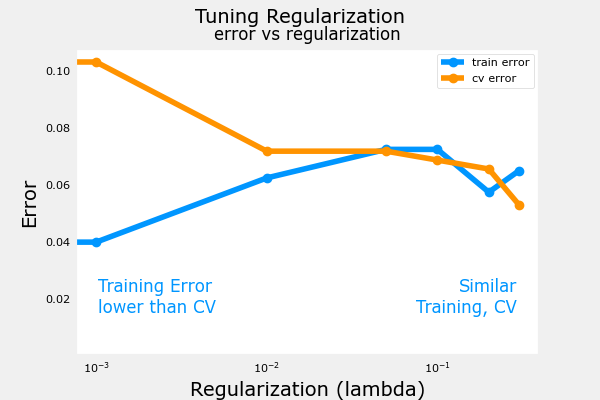

In [60]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

<a name="7.1"></a>
### 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance. 

3/3 [==============================] - 0s 748us/step


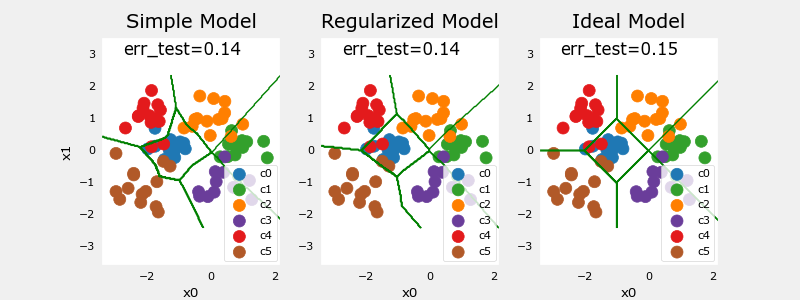

In [61]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

Our test set is small and seems to have a number of outliers so classification error is high. However, the performance of our optimized models is comparable to ideal performance.

## Congratulations! 
You have become familiar with important tools to apply when evaluating your machine learning models. Namely:  
* splitting data into trained and untrained sets allows you to differentiate between underfitting and overfitting
* creating three data sets, Training, Cross-Validation and Test allows you to
    * train your parameters $W,B$ with the training set
    * tune model parameters such as complexity, regularization and number of examples with the cross-validation set
    * evaluate your 'real world' performance using the test set.
* comparing training vs cross-validation performance provides insight into a model's propensity towards overfitting (high variance) or underfitting (high bias)